# HDB Resale Flat Prices Analysis and Prediction

This notebook presents a comprehensive exploratory data analysis (EDA) and predictive modeling for HDB (Housing & Development Board) resale flat prices in Singapore from 2017 to 2020. The objective is to uncover insights from historical transaction data and to develop a predictive model to estimate resale prices.

## Exploratory Data Analysis (EDA)
The EDA section covers the following aspects:
- **Data Cleaning**: This is where I clean the data to prepare the data for analysis.
- **Data Visualization**: I visualize various aspects of the dataset, including the distribution of resale prices, the relationship between floor area and flat types, and the impact of storey range on resale prices.
- **Statistical Summaries**: I provided summary statistics for different attributes, which help in understanding the central tendencies and dispersions within the data.

## Predictive Modeling
Using the `fastai` library's `TabularPandas` and `TabularLearner`, I create a predictive model:
- **Data Preprocessing**: The dataset is processed with appropriate transformations, normalization, and encoding of categorical variables.
- **Model Training**: A neural network model is trained to predict resale prices. I use a validation set split based on the time to ensure that our model can generalize well to future data.
- **Learning Rate Finder**: I employ the learning rate finder to choose an optimal learning rate for training the model.
- **Model Evaluation**: The model's performance is evaluated on the validation set using metrics such as RMSE (Root Mean Squared Error), and I visualize the predicted vs. actual prices to assess the model's predictive accuracy.

In [1]:
# Import all required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.imports import *
from fastai.tabular.all import *

### Loading the dataset into a dataframe

In [2]:
df = pd.read_csv('./resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [3]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
df.shape

(80374, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80374 entries, 0 to 80373
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                80374 non-null  object 
 1   town                 80374 non-null  object 
 2   flat_type            80374 non-null  object 
 3   block                80374 non-null  object 
 4   street_name          80374 non-null  object 
 5   storey_range         80374 non-null  object 
 6   floor_area_sqm       80374 non-null  float64
 7   flat_model           80374 non-null  object 
 8   lease_commence_date  80374 non-null  int64  
 9   remaining_lease      80374 non-null  object 
 10  resale_price         80374 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 6.7+ MB


In [6]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

Upon initial examination, there are no missing values in the dataset which is rather fortunate for me as it simplifies the data preparation stage.

In [7]:
df.describe(include='all')

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
count,80374,80374,80374,80374,80374,80374,80374.000000,80374,80374.000000,80374,8.037400e+04
unique,45,26,7,2446,548,17,NaN,20,NaN,623,NaN
top,2018-07,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,94 years 11 months,NaN
freq,2539,6408,33282,273,1245,18697,NaN,26288,NaN,615,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,97.617804,NaN,1994.117501,NaN,4.393165e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,24.285811,NaN,12.839267,NaN,1.533902e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,1966.000000,NaN,1.400000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,1984.000000,NaN,3.300000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,1994.000000,NaN,4.100000e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,NaN,2003.000000,NaN,5.150000e+05


### Data Cleaning

In [8]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

For the 'flat_type' column, I am treating it as an ordinal column, where the number of rooms implies a natural order, I sorted from smallest to largest

In [9]:
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [10]:
# Convert to categorical data type
df['flat_type'] = pd.Categorical(df['flat_type'], 
                                 categories=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'MULTI-GENERATION', 'EXECUTIVE'], 
                                 ordered=True)

In [11]:
df['flat_type'].unique()

['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM', 'MULTI-GENERATION']
Categories (7, object): ['1 ROOM' < '2 ROOM' < '3 ROOM' < '4 ROOM' < '5 ROOM' < 'MULTI-GENERATION' < 'EXECUTIVE']

In [12]:
df['flat_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 80374 entries, 0 to 80373
Series name: flat_type
Non-Null Count  Dtype   
--------------  -----   
80374 non-null  category
dtypes: category(1)
memory usage: 79.0 KB


In [13]:
df['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [14]:
df['lease_commence_date'].unique()

array([1979, 1978, 1980, 1981, 1976, 1977, 2011, 2012, 1996, 1988, 1985,
       1986, 1974, 1984, 1983, 1987, 1982, 2000, 2001, 2005, 1989, 2010,
       1972, 1993, 1973, 1992, 1990, 1998, 2004, 1997, 1971, 1975, 1970,
       1969, 2013, 2008, 1999, 2003, 2002, 1995, 2006, 1967, 1968, 2007,
       1991, 1966, 2009, 1994, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

The 'remaining_lease' column contains string data, which can be hard to decipher. To keep things simple, I will be extracting just the years from the column, as this will provide a straightforward numerical value that reflects the remaining duration of the lease. This simplification will facilitate easier analysis and comparison with other time-related features in the dataset, such as the 'lease_commence_date'.

In [15]:
# Function to convert remaining lease to total years
def convert_lease_to_years(remaining_lease):
    years = int(remaining_lease.split(' ')[0])
    return years

In [16]:
df['remaining_lease_years'] = df['remaining_lease'].apply(convert_lease_to_years)

In [17]:
df['remaining_lease_years'].unique()

array([61, 60, 62, 63, 58, 59, 93, 94, 78, 70, 67, 68, 56, 66, 65, 69, 64,
       83, 87, 71, 92, 54, 82, 75, 55, 74, 72, 80, 86, 79, 53, 57, 52, 51,
       95, 90, 81, 85, 84, 77, 88, 49, 50, 89, 73, 48, 76, 91, 96, 47, 46,
       45, 97], dtype=int64)

In [18]:
# Drop the original column
df = df.drop('remaining_lease', axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80374 entries, 0 to 80373
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   month                  80374 non-null  object  
 1   town                   80374 non-null  object  
 2   flat_type              80374 non-null  category
 3   block                  80374 non-null  object  
 4   street_name            80374 non-null  object  
 5   storey_range           80374 non-null  object  
 6   floor_area_sqm         80374 non-null  float64 
 7   flat_model             80374 non-null  object  
 8   lease_commence_date    80374 non-null  int64   
 9   resale_price           80374 non-null  float64 
 10  remaining_lease_years  80374 non-null  int64   
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 6.2+ MB


### Visualizing the data

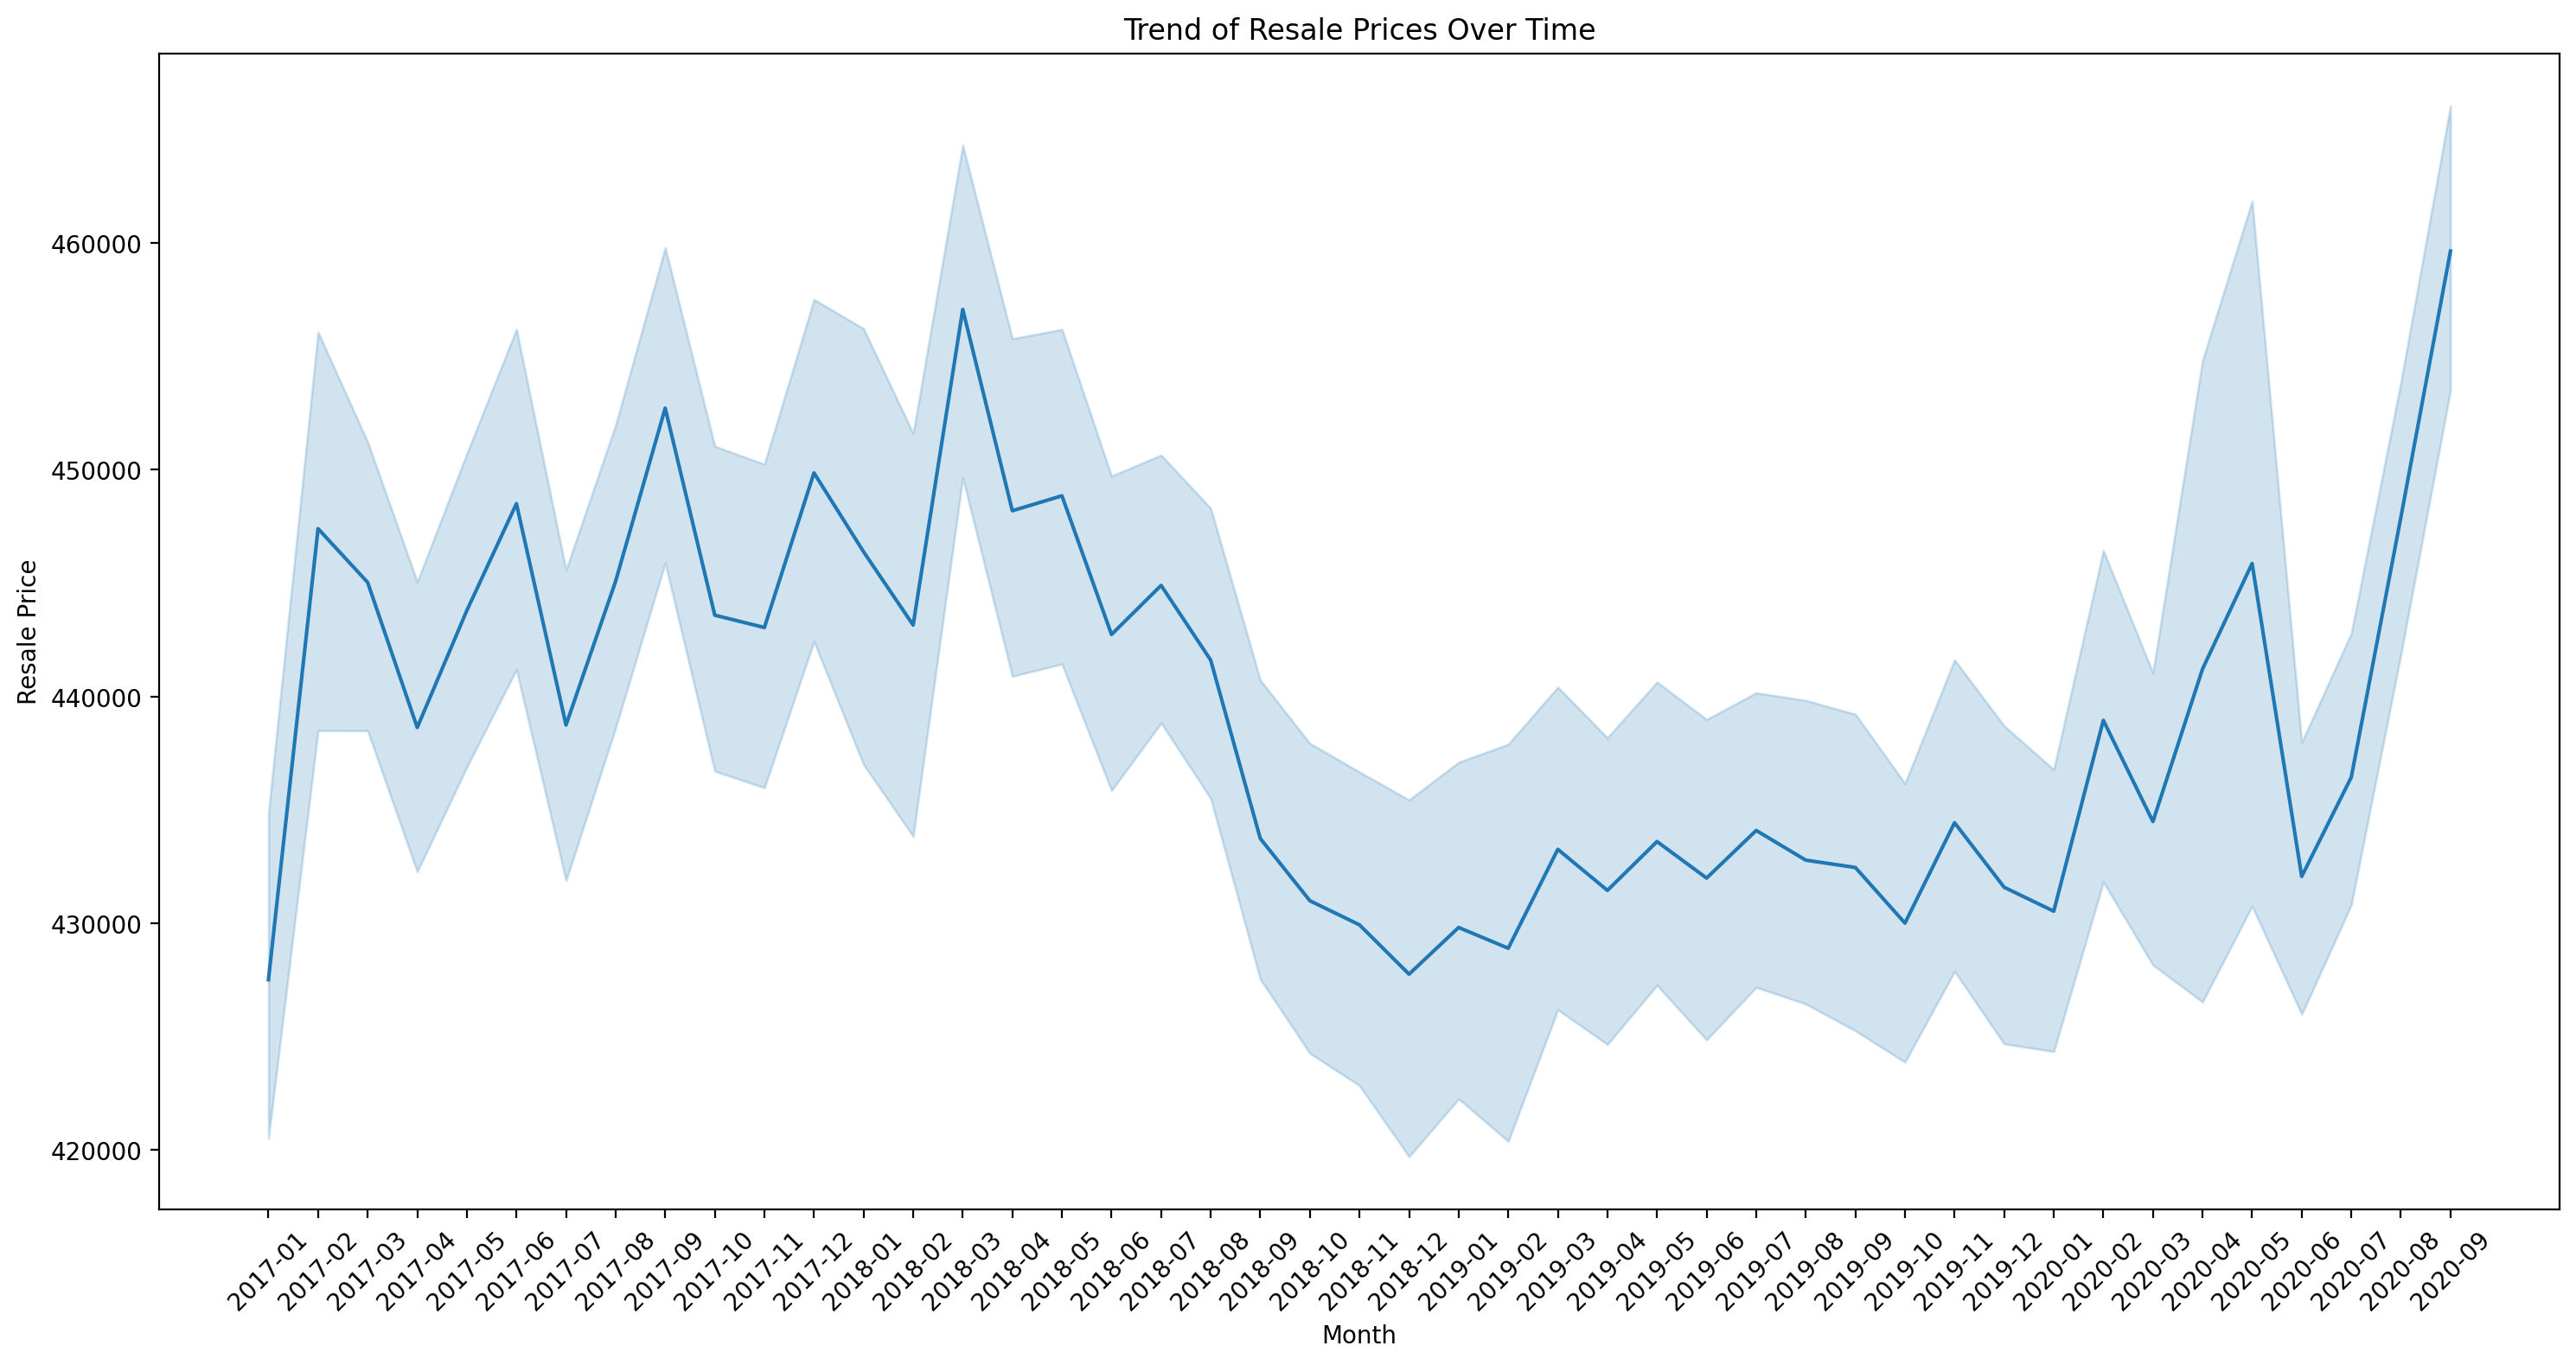

In [20]:
# Trend Analysis Over Time
plt.figure(figsize=(15,8), dpi=200)
sns.lineplot(x='month', y='resale_price', data=df)
plt.title('Trend of Resale Prices Over Time')
plt.xlabel('Month')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

Looking at the time series plot above showing the resale prices for HDB flats from 2017 - late 2020, we can observe the following:

**Initial Variability**: There is fluctuation in resale prices and I believe this is common in real estate markets due to factors such as supply and demand, economics and etc. However you can notice that the prices of resale flats were generally higher in 2017 compared to 2018-2019.

**Sharp increase during COVID-19**: However, starting March 2023, you can notice a noticeable sharp increase in resale price, which also coincides with the onset of COVID-19 pandemic, which has had a significant impact on the resale prices.

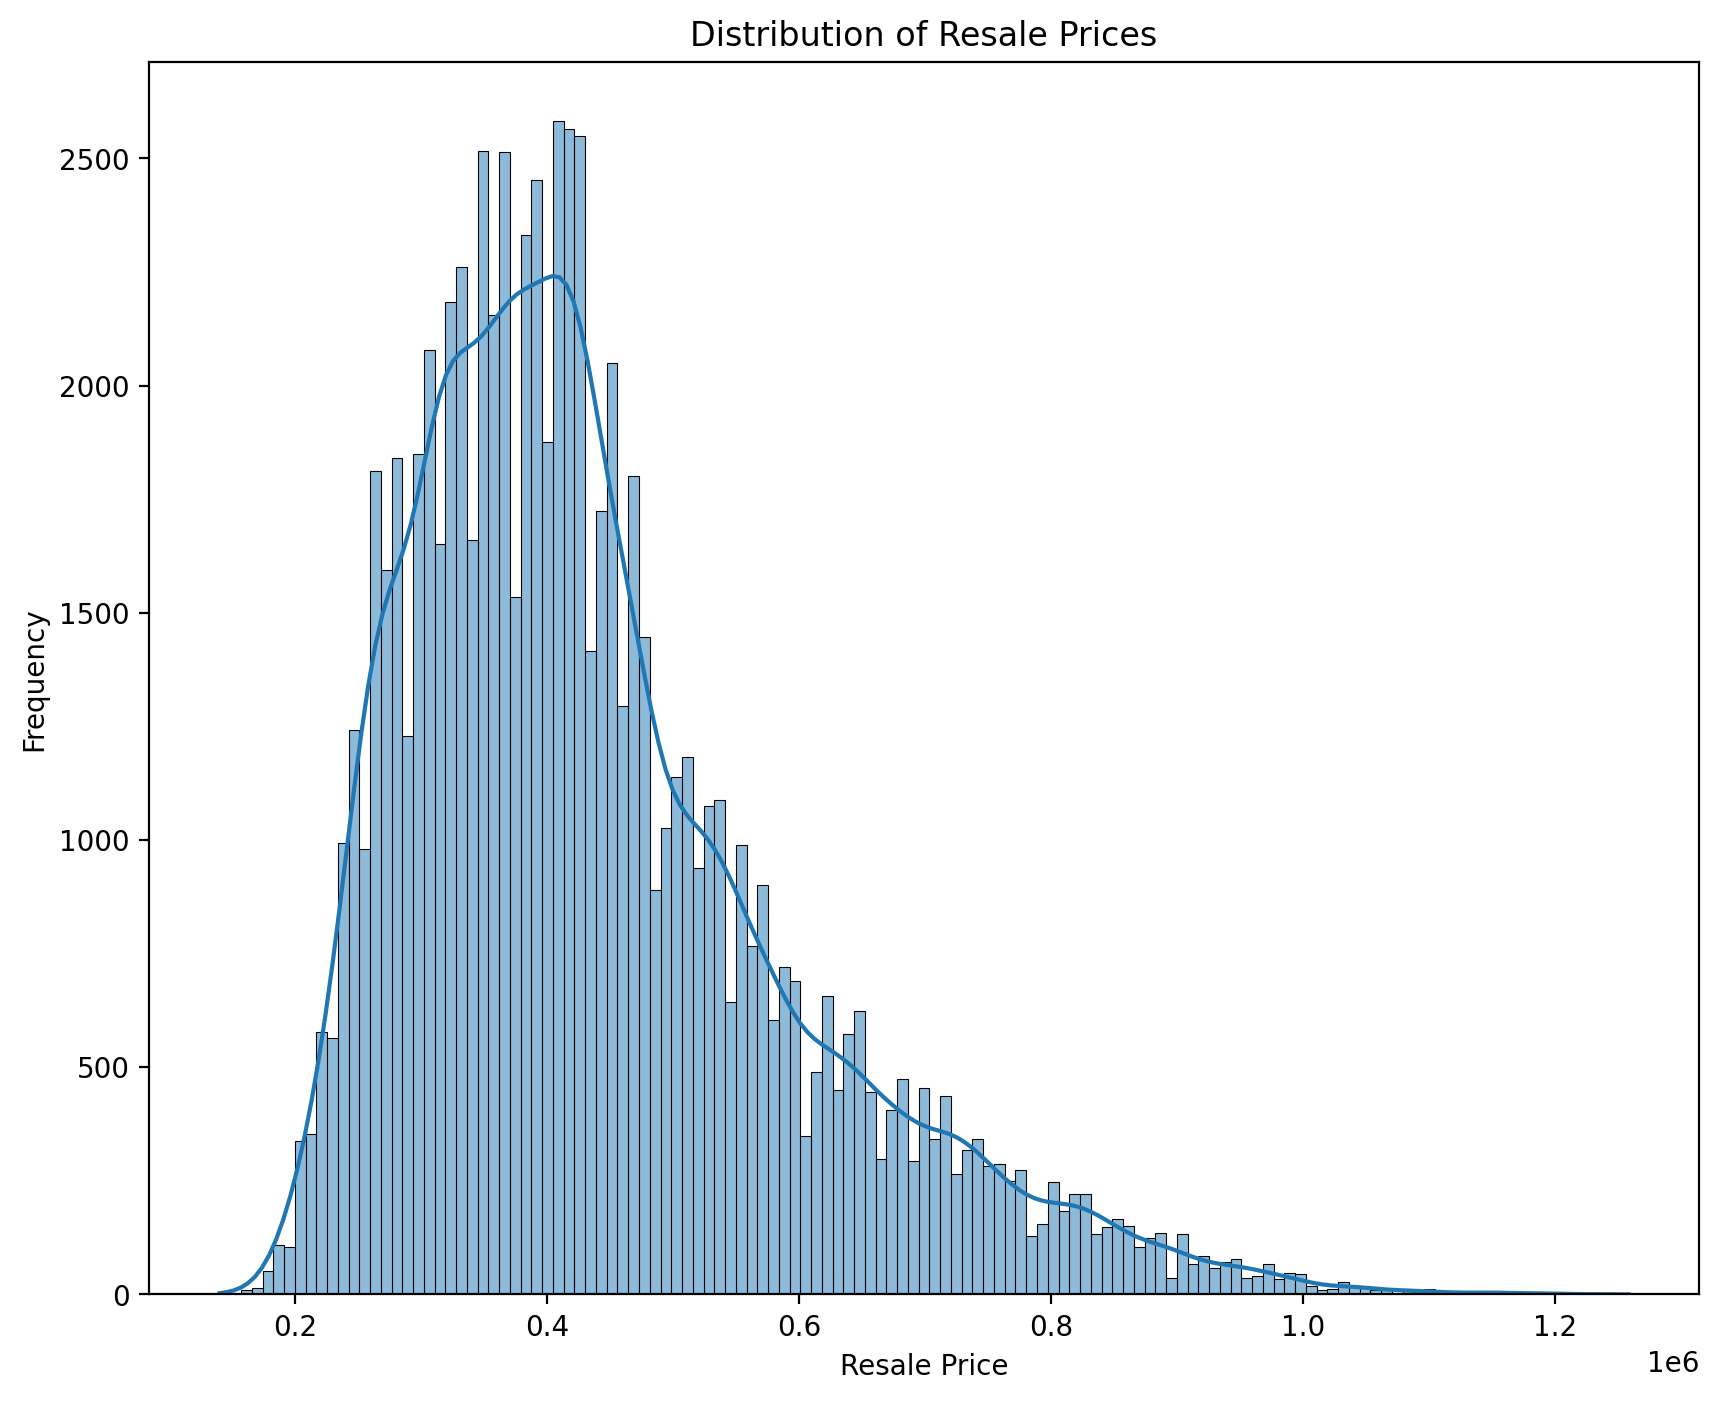

In [21]:
# Distribution of Resale Prices
plt.figure(figsize=(10,8), dpi=200)
sns.histplot(df['resale_price'], kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show();

Most sales fall between 300-500k price range, showing that the resale market if mostly concentrated around more buduget friendly options, with fewer transactions occuring at higher price points. This could reflect the overall affordability of HDB flats. However, this is just a rough generalization and we should take into account other factors, such as location, number of rooms and etc, which we will look into now.

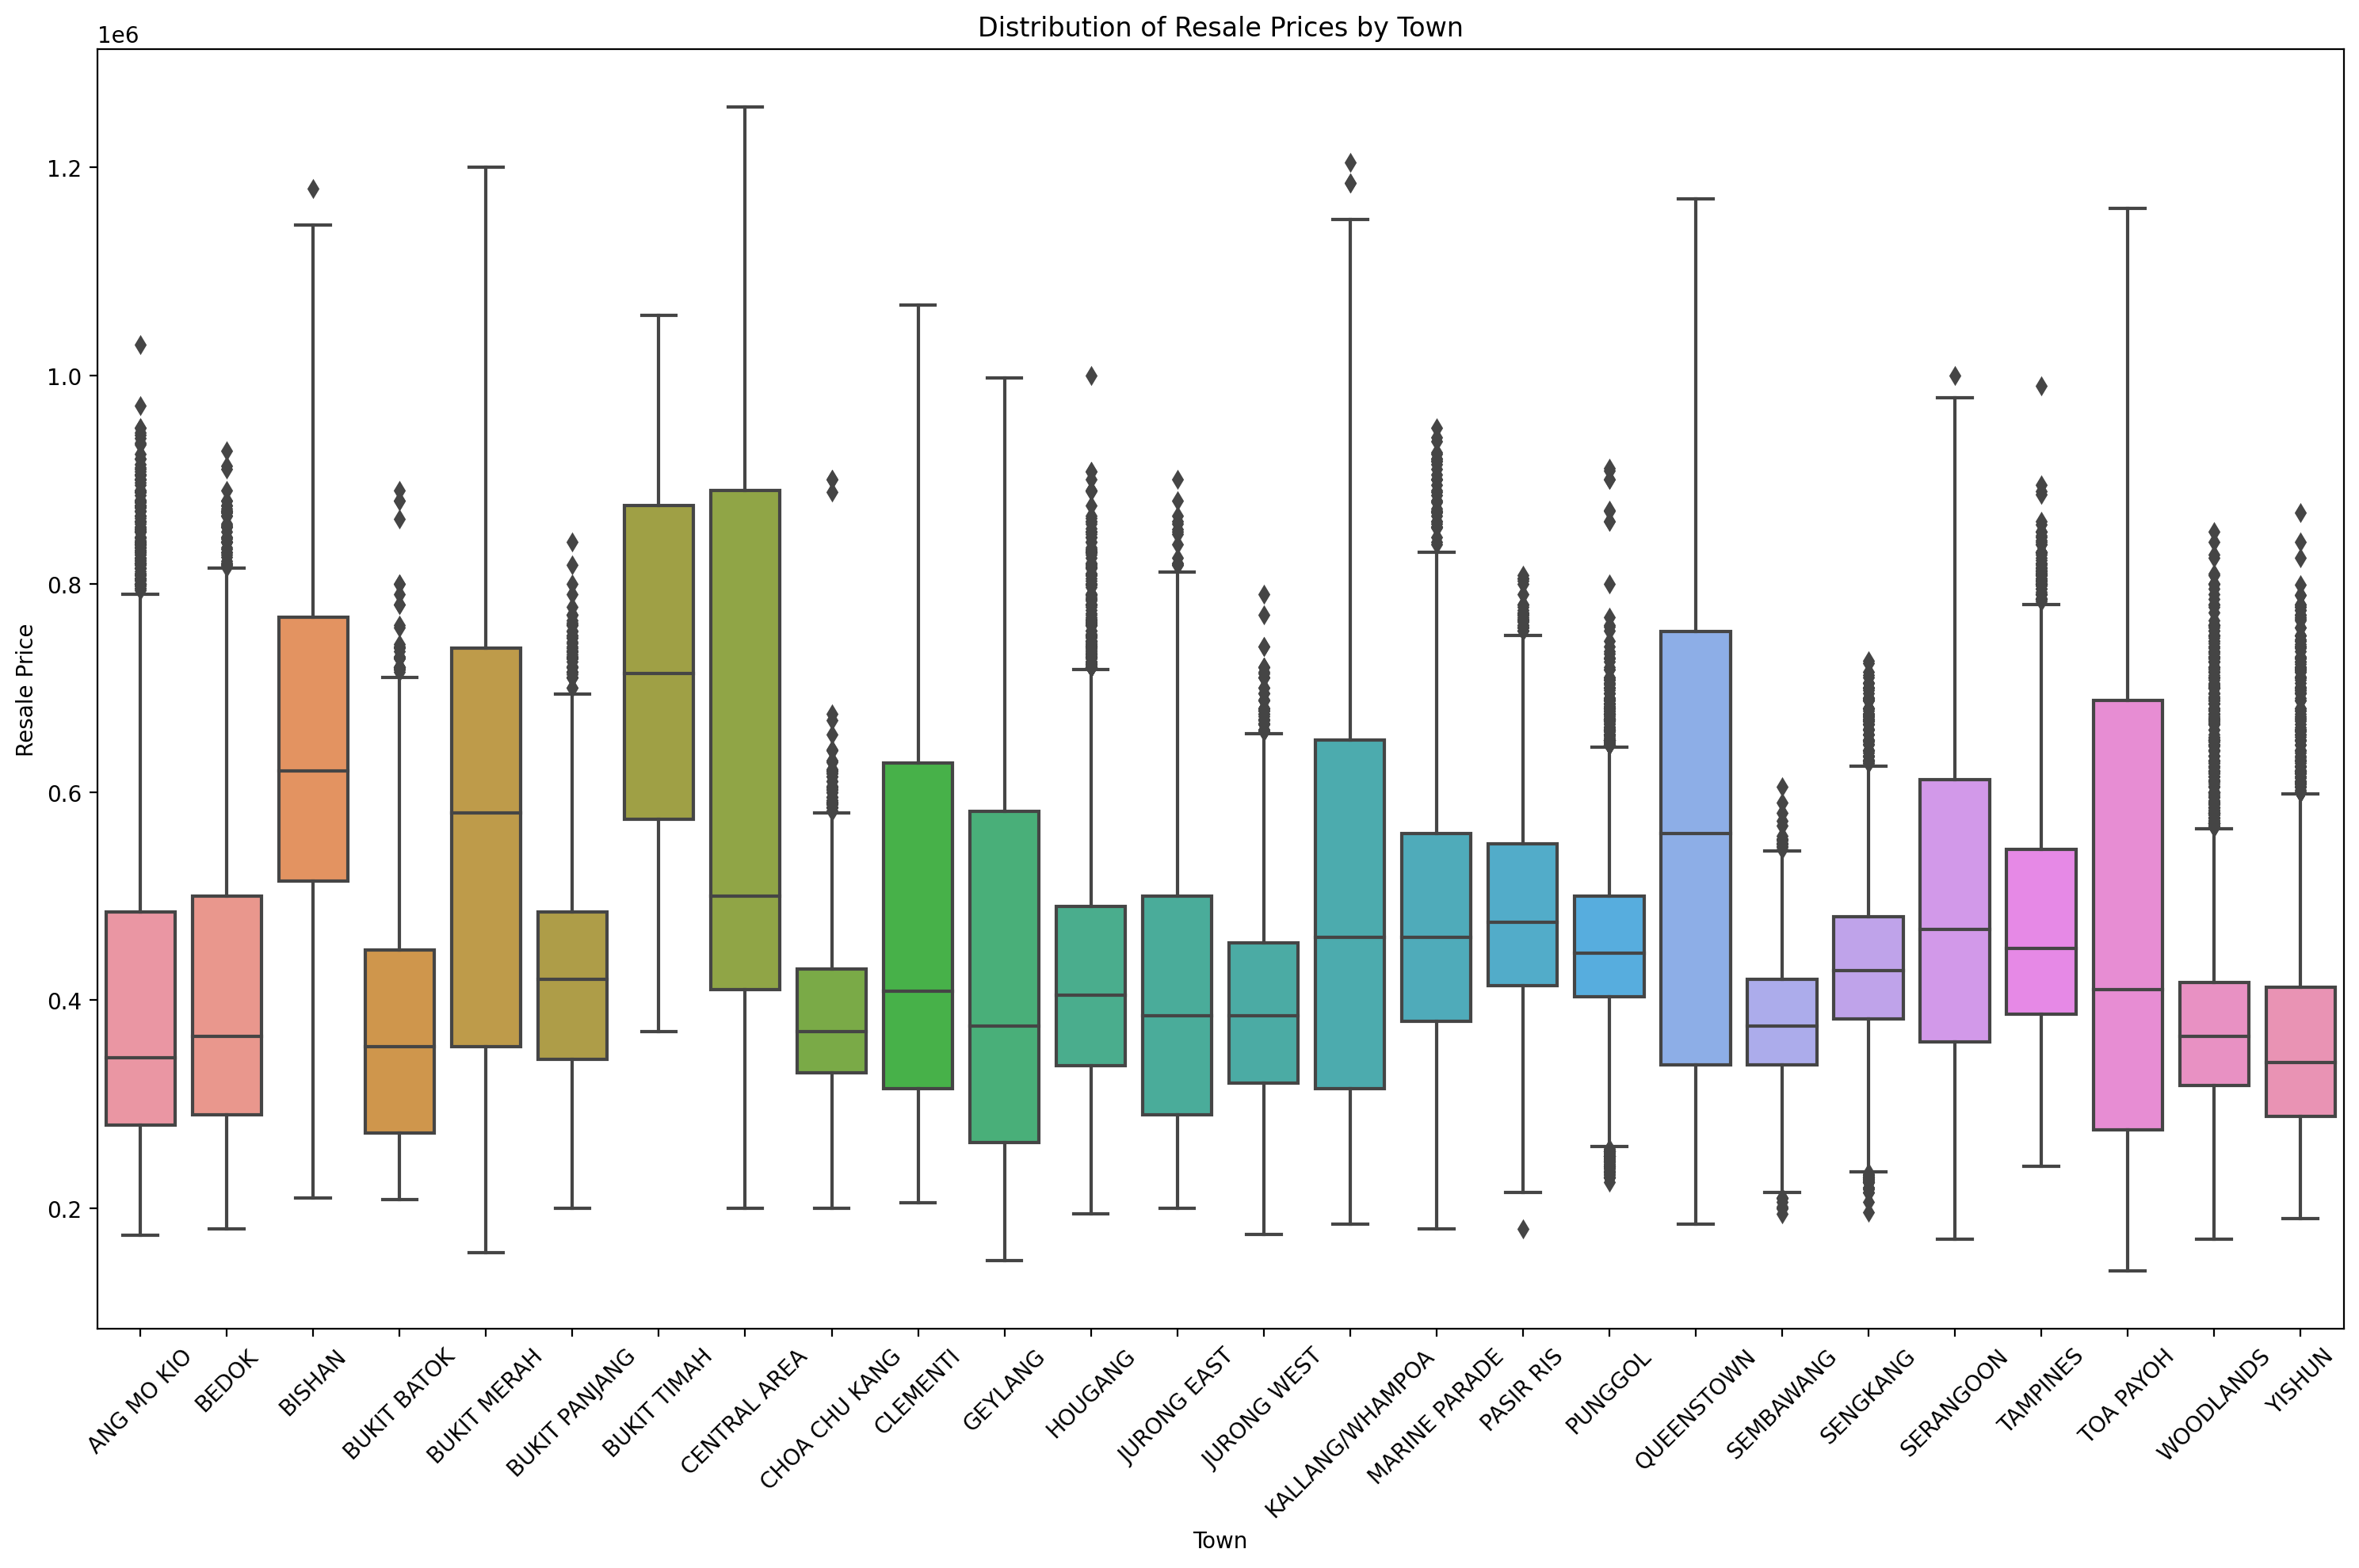

In [22]:
# Boxplot showing distribution of prices within each town
plt.figure(figsize=(15,10), dpi=200)
sns.boxplot(x='town', y='resale_price', data=df)
plt.xticks(rotation=45)  
plt.title('Distribution of Resale Prices by Town')
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.tight_layout()  
plt.show()

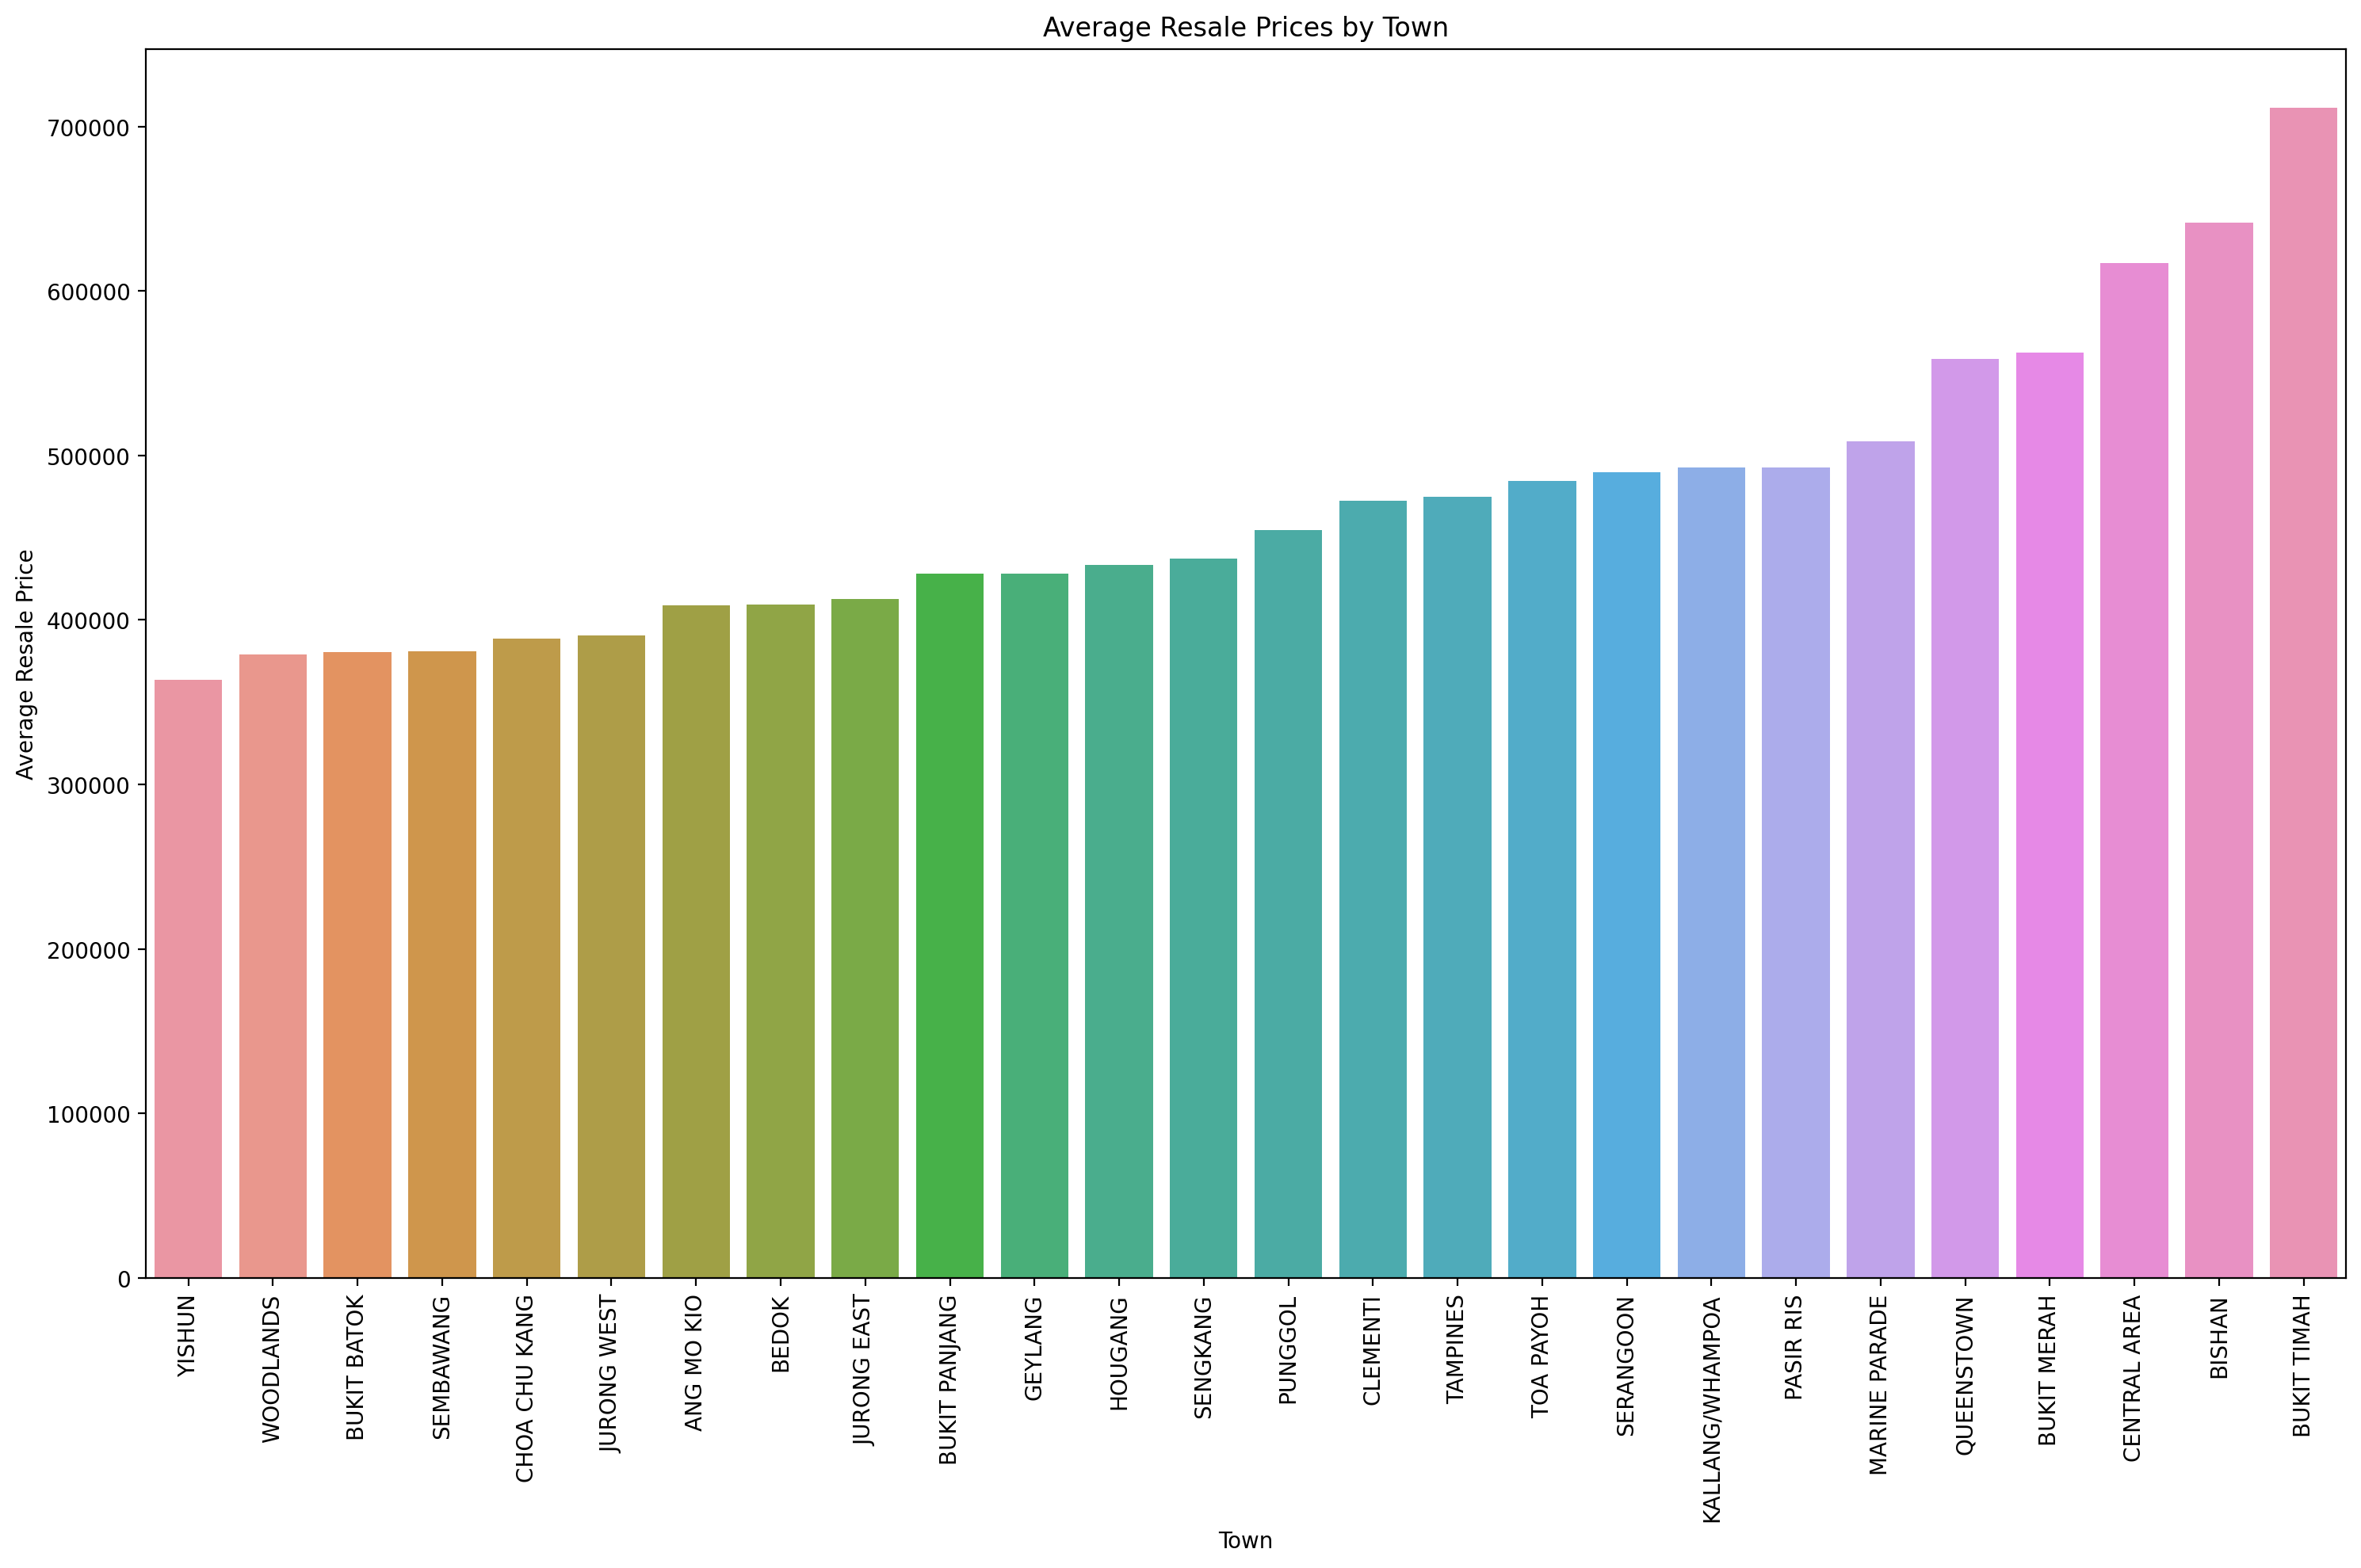

In [23]:
plt.figure(figsize=(15, 10), dpi=200)  # Adjust the size as needed
town_prices = df.groupby('town')['resale_price'].mean().sort_values()  # This sorts the towns by average price
sns.barplot(x=town_prices.index, y=town_prices.values)
plt.xticks(rotation=90)
plt.title('Average Resale Prices by Town')
plt.xlabel('Town')
plt.ylabel('Average Resale Price')
plt.tight_layout()
plt.show()

From the boxplot, you can see the different variation in prices across the different Towns. For example, the median price of a HDB sold in Ang Mo Kio is 345k, however, the max is 1.03 million with many outliers hovering between 800k - 1 millionm, showing the discrepency in house prices. However, this could also mean that the more expensive houses are bigger and at primed locations.

Based on the median price, Bukit Timah, Bishan, Central Area, Bukit Merah, Queenstown are generally a more expensive area to live in.

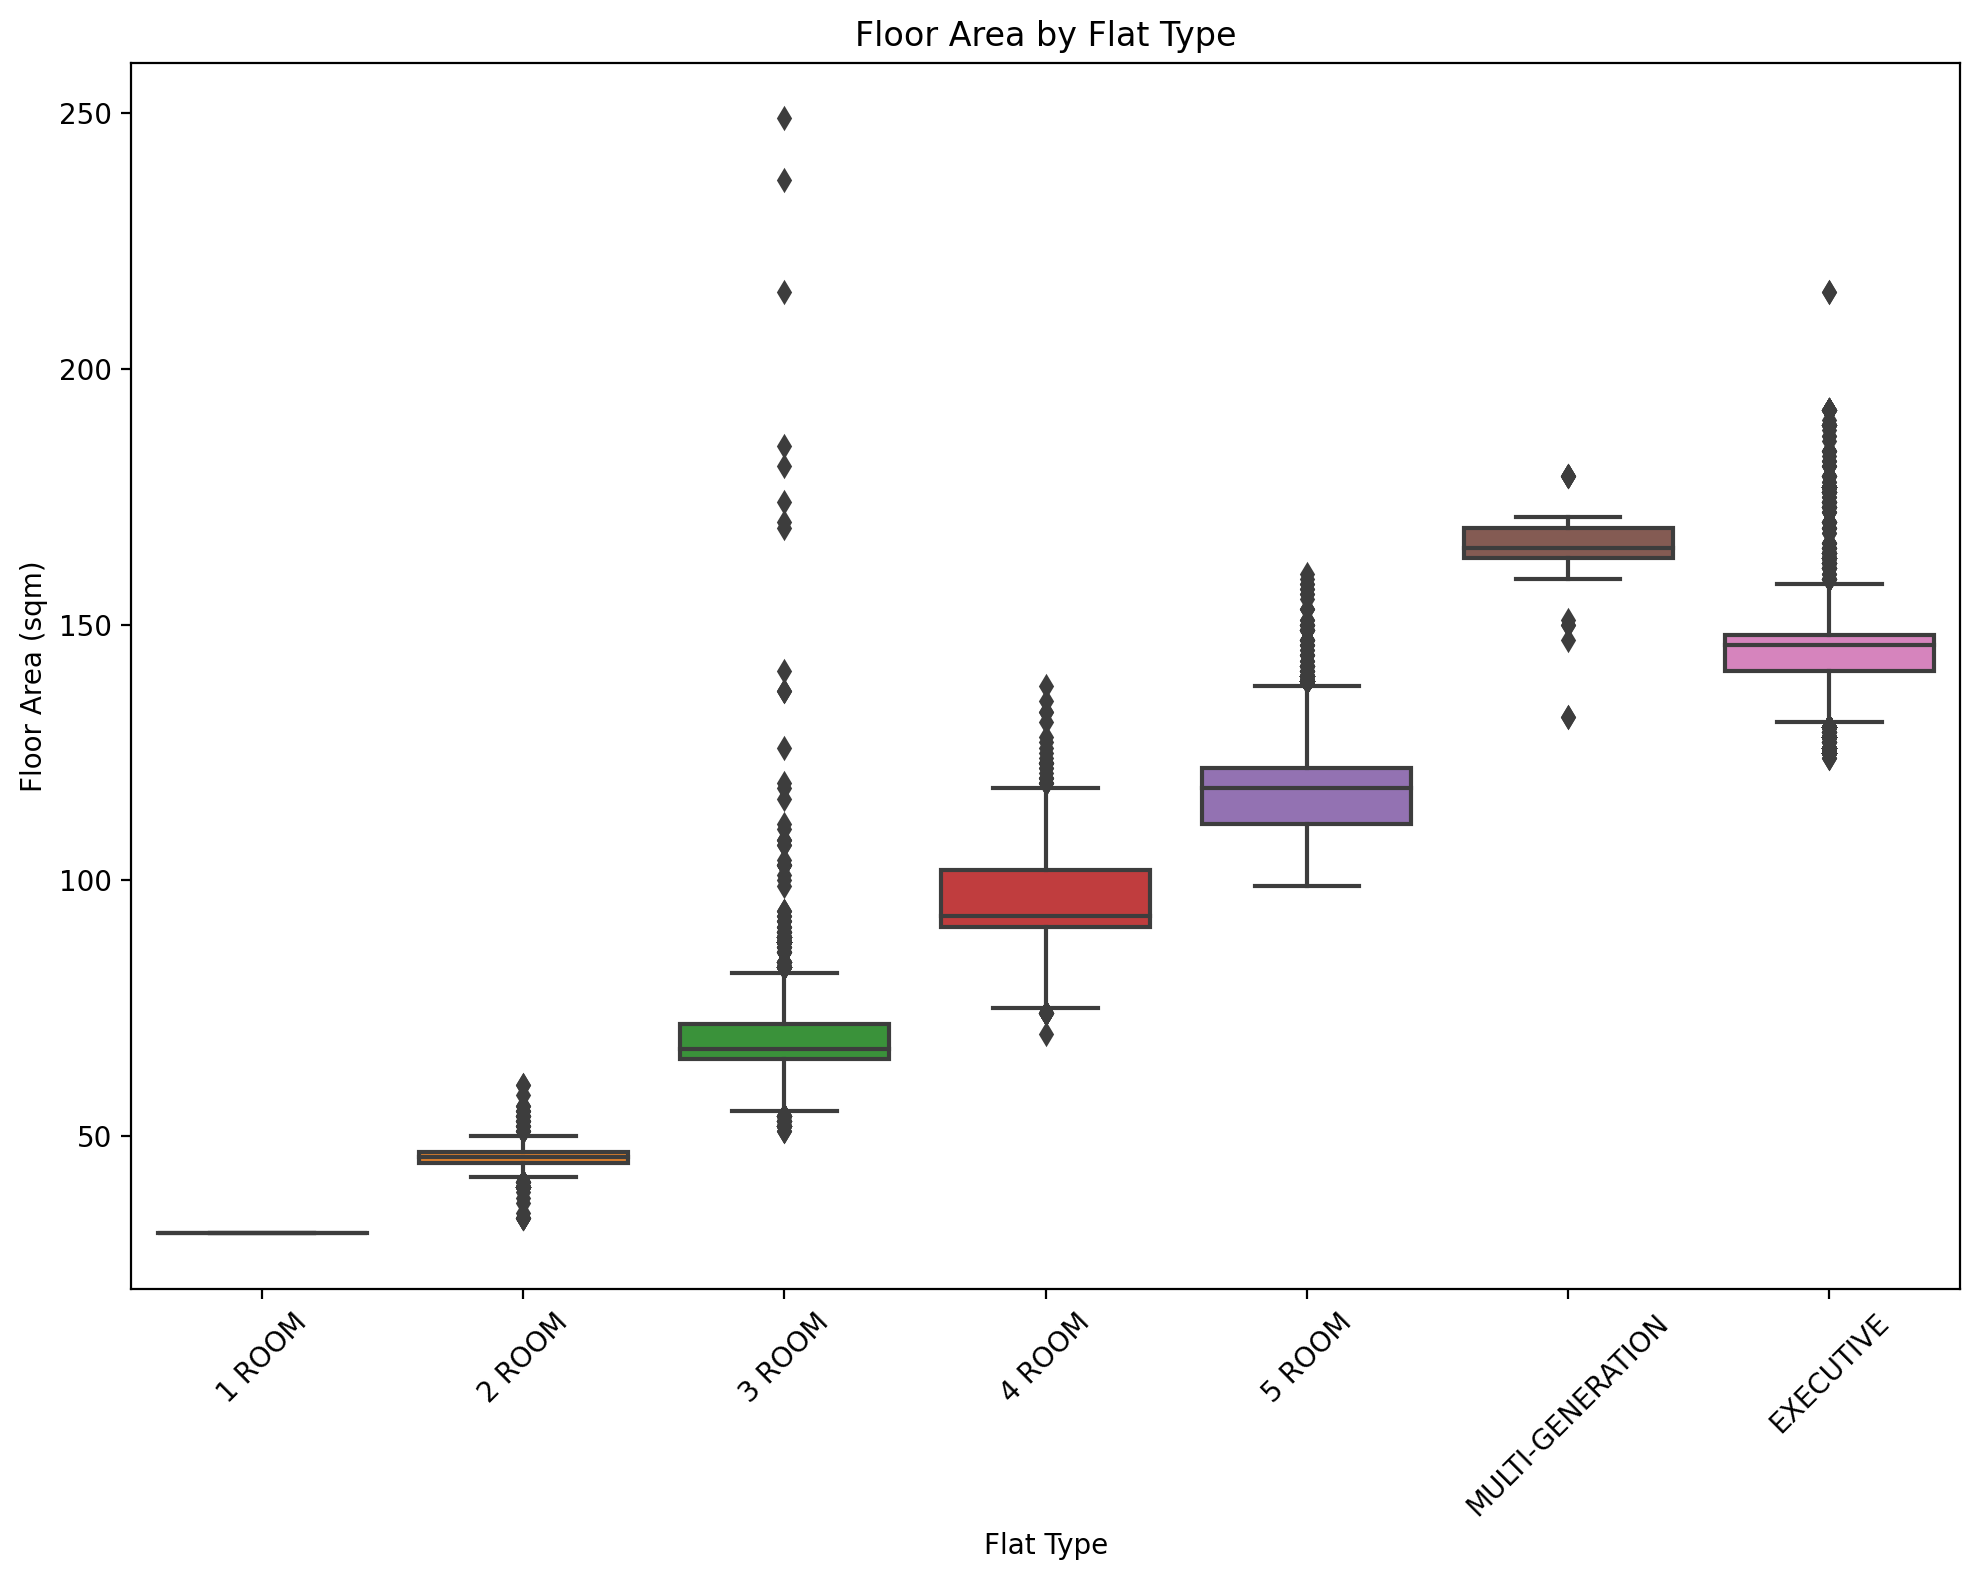

In [24]:
# Box plot of the floor area of each flat type
plt.figure(figsize=(10, 8), dpi = 200) 
sns.boxplot(x='flat_type', y='floor_area_sqm', data=df)
plt.title('Floor Area by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Floor Area (sqm)')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

As what I have expected, the size of each flat type generally goes higher the more rooms you have, however you can notice that for the 3 room flats, there are plenty of outliers and the max is around 250 sqrm where the median is only around 70, which is a huge discrepency. Another thing to note is the median size for Multi-Generation and Executive flats, where Multi-generation is higher when typically, Executive is said to be higher as according to propertyguru, Multi-Generation flats are typically 115 sqrm, whereas Executive flats are typically 130 sqrm. However, you can see that for executive flats, there are plenty of outliers, with the highest being over 200 sqrm.

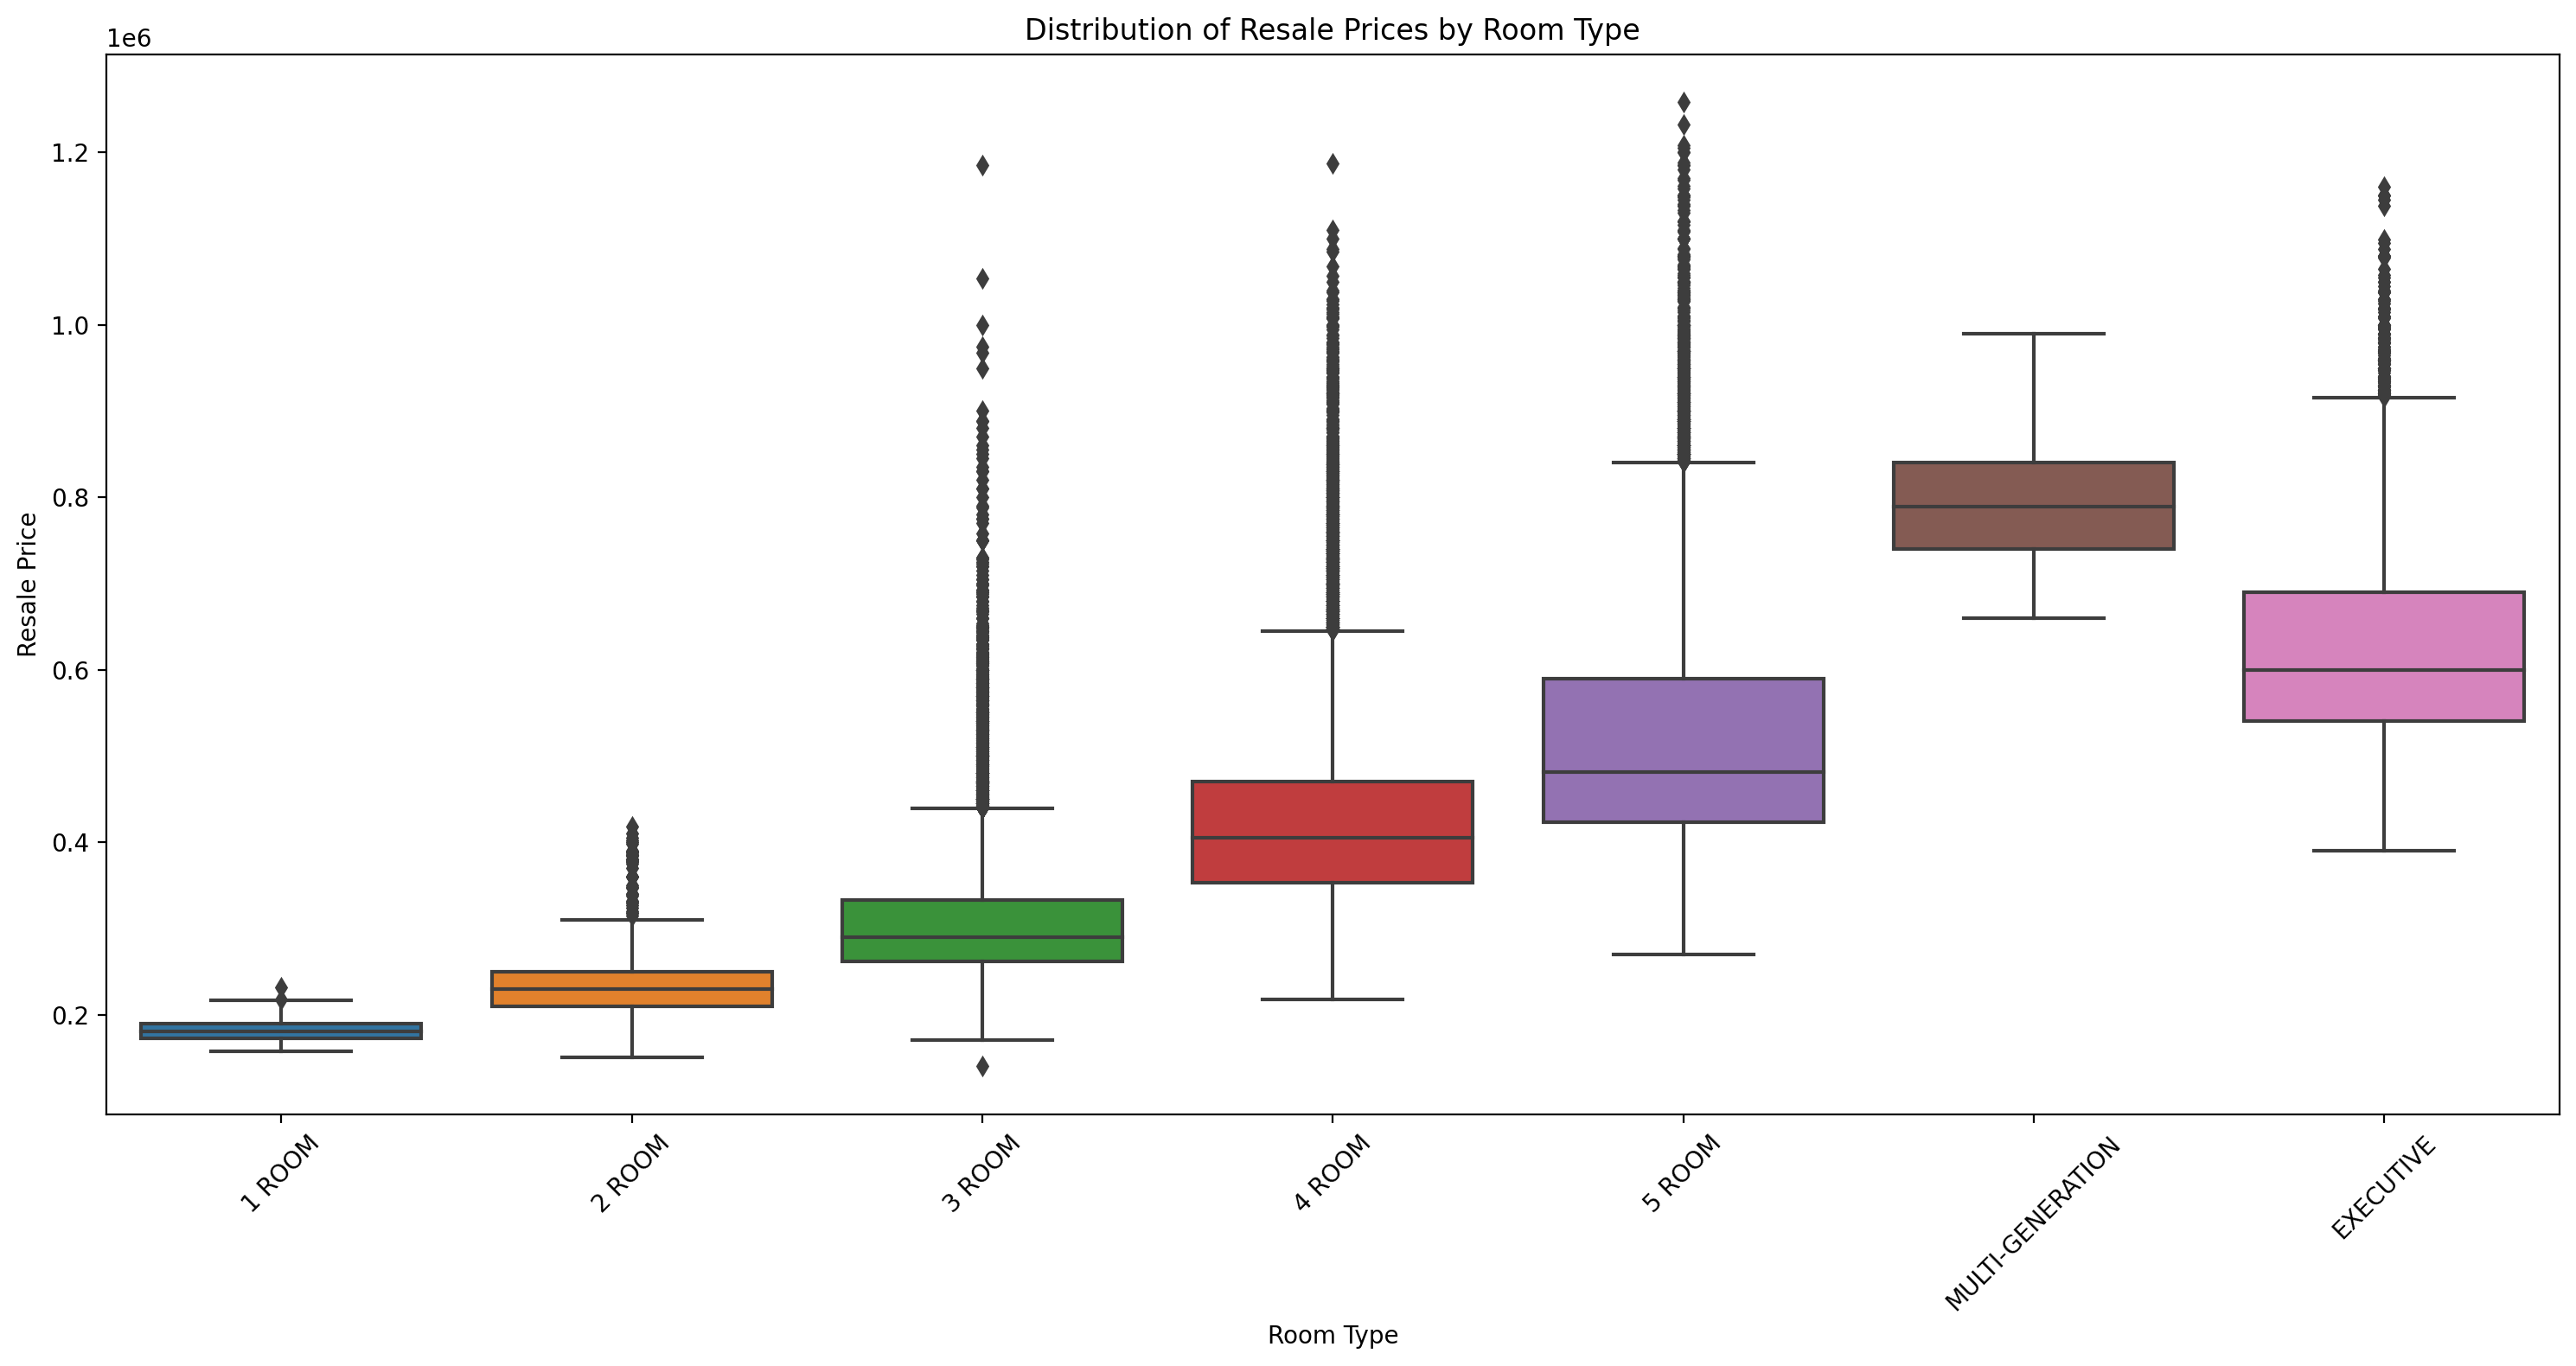

In [25]:
# Box plot showing resale prices by room type
plt.figure(figsize=(15, 8), dpi = 200)  
sns.boxplot(x='flat_type', y='resale_price', data=df)
plt.xticks(rotation=45)  
plt.title('Distribution of Resale Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Resale Price')
plt.tight_layout()  
plt.show()

From the above 2 box charts, you can see a correlation between room type, floor area, and resale prices. Both the graphs show an increasing trend as we move from 1-room all the way to executive flats. the outliers in the 2 box charts correlates with price increase, showing that depending on the room type and the size of the hosue, the price will increase accordingly. Interestingly, there are no otliers for Multi-Generation flats.

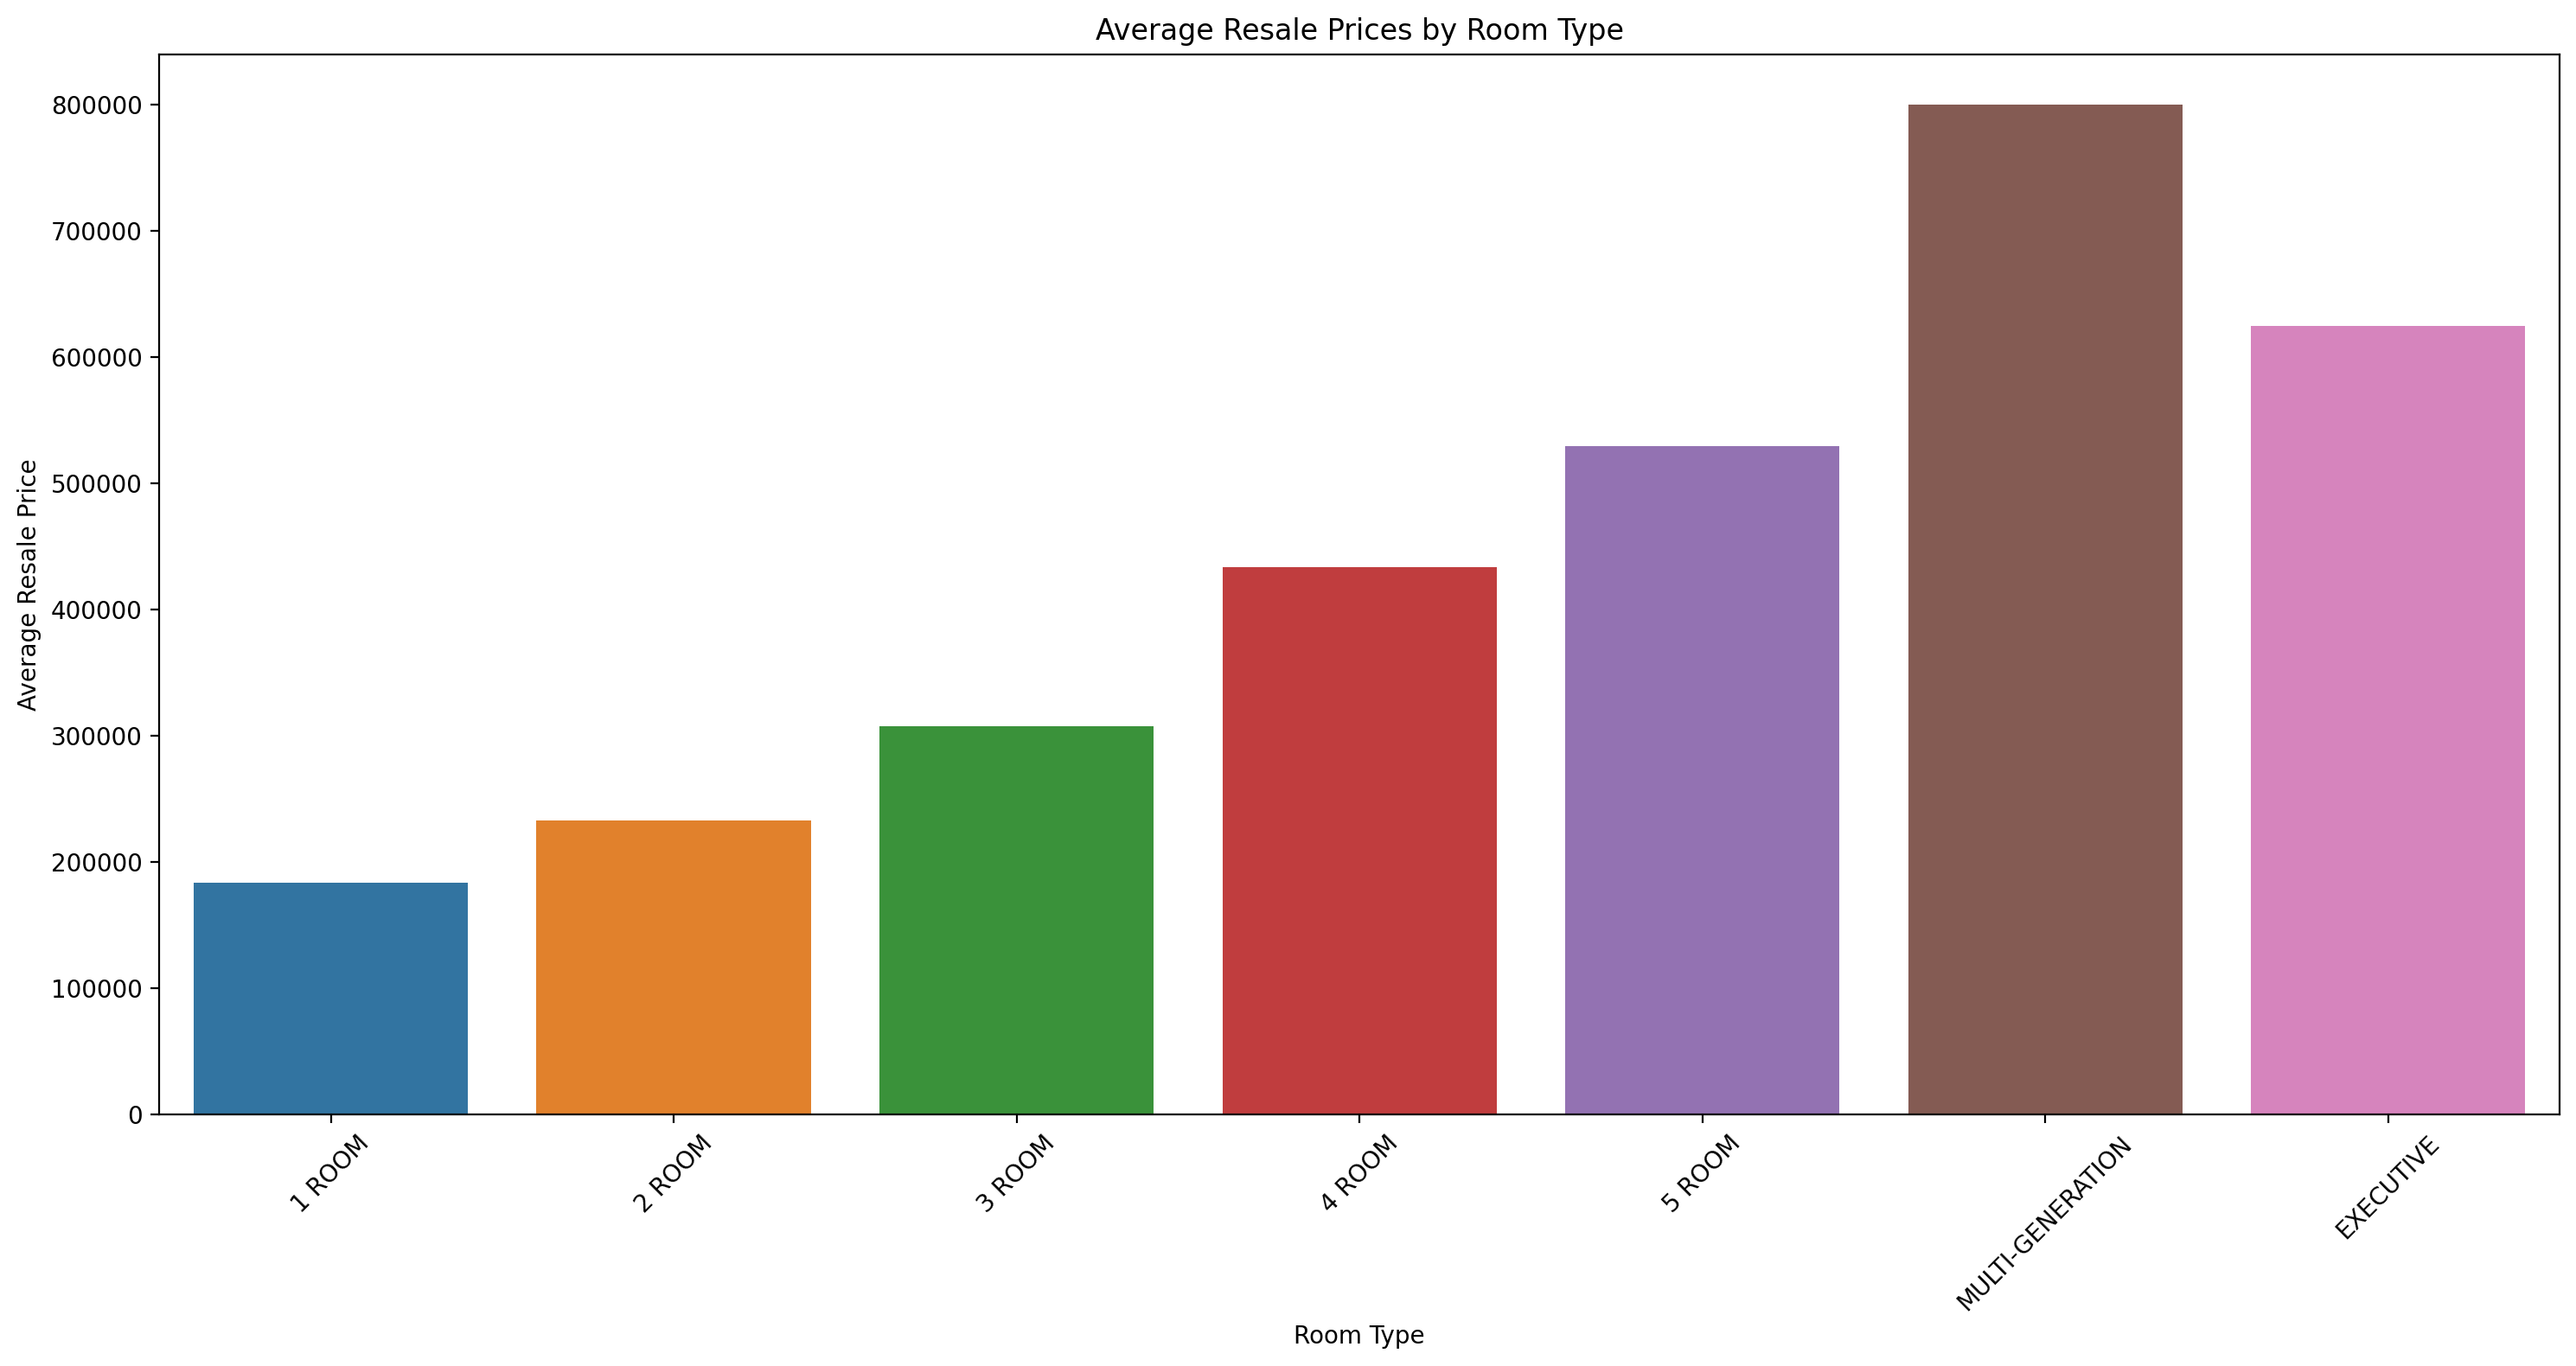

In [26]:
# graph showing average prices of room type
plt.figure(figsize=(15, 8), dpi = 200)  
room_type_prices = df.groupby('flat_type')['resale_price'].mean().sort_values() 
sns.barplot(x=room_type_prices.index, y=room_type_prices.values)
plt.xticks(rotation=45)
plt.title('Average Resale Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Resale Price')
plt.tight_layout()
plt.show()

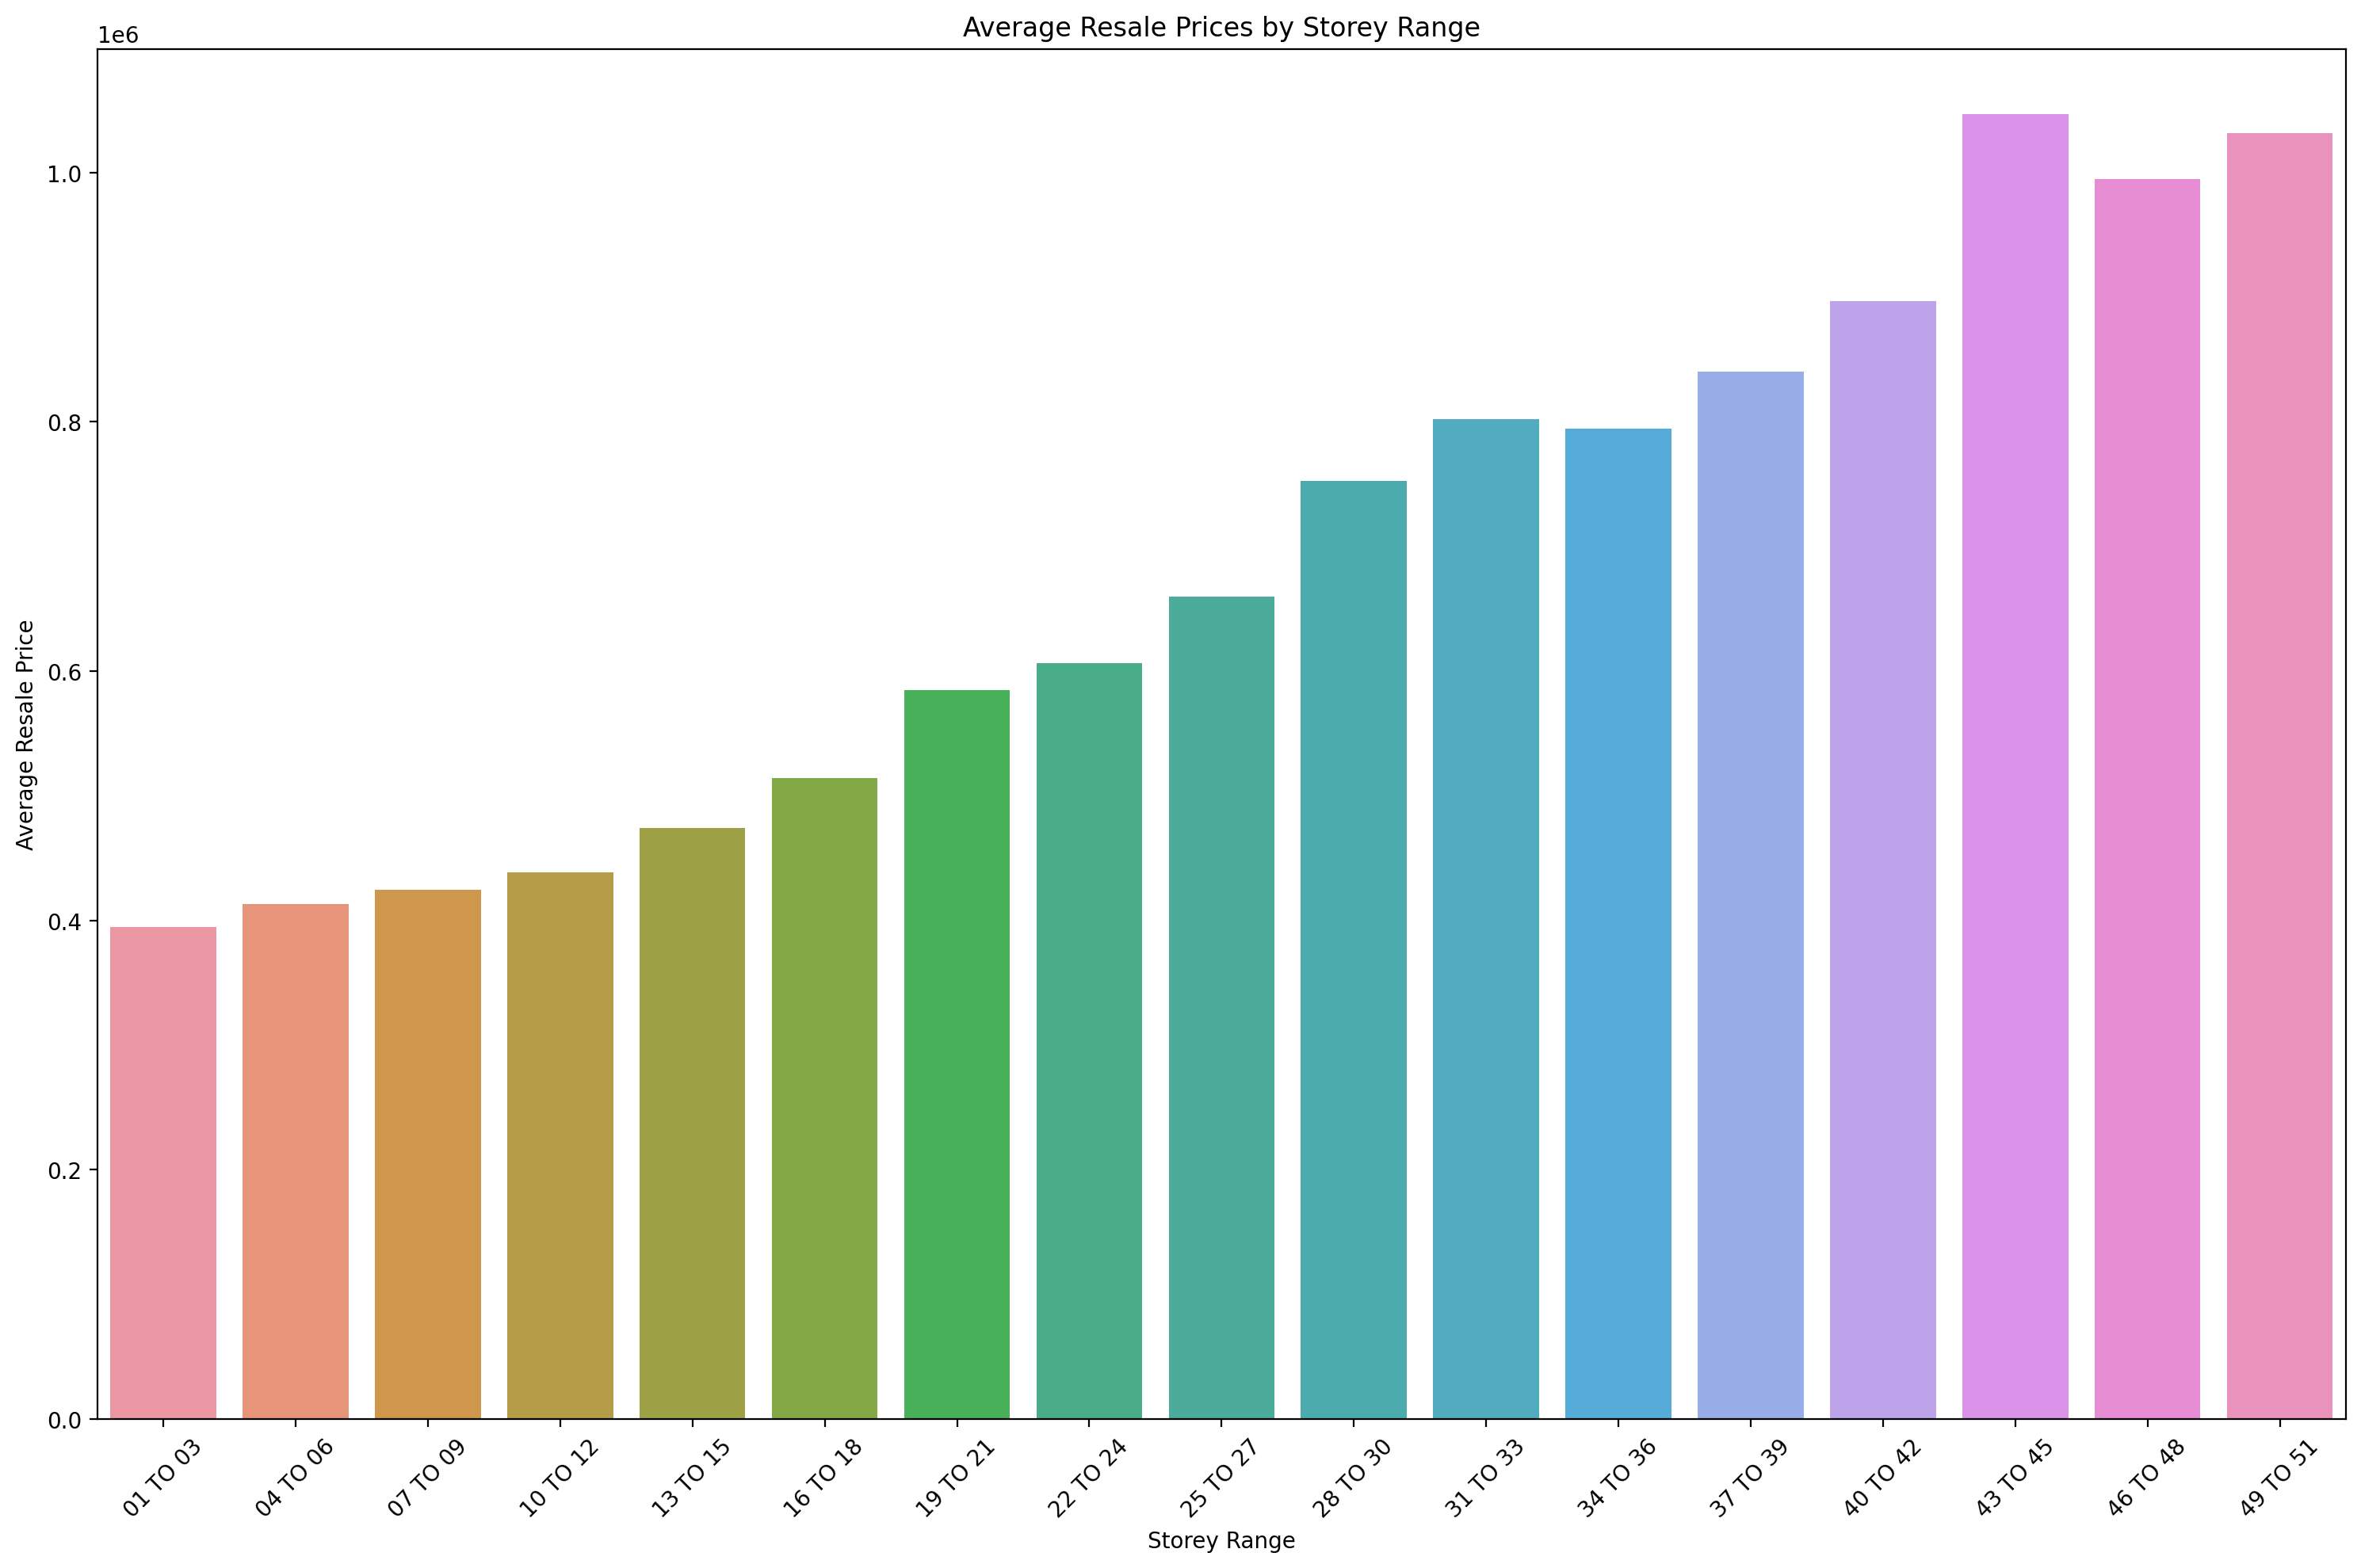

In [27]:
plt.figure(figsize=(15, 10), dpi =200) 
mean_prices = df.groupby('storey_range')['resale_price'].mean().sort_index()
sns.barplot(x=mean_prices.index, y=mean_prices.values)
plt.title('Average Resale Prices by Storey Range')
plt.xlabel('Storey Range')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show();

Looking at the average resale prices by the storey the house is located at, the higher the floor, the more expensive the house is. This could mean that higher floors are generally more valued, likely due to factors such as better views, quieter living conditions, and a lower likelihood of pests or privacy intrusions. These attributes contribute to a higher perceived value and thus command higher prices in the resale market.

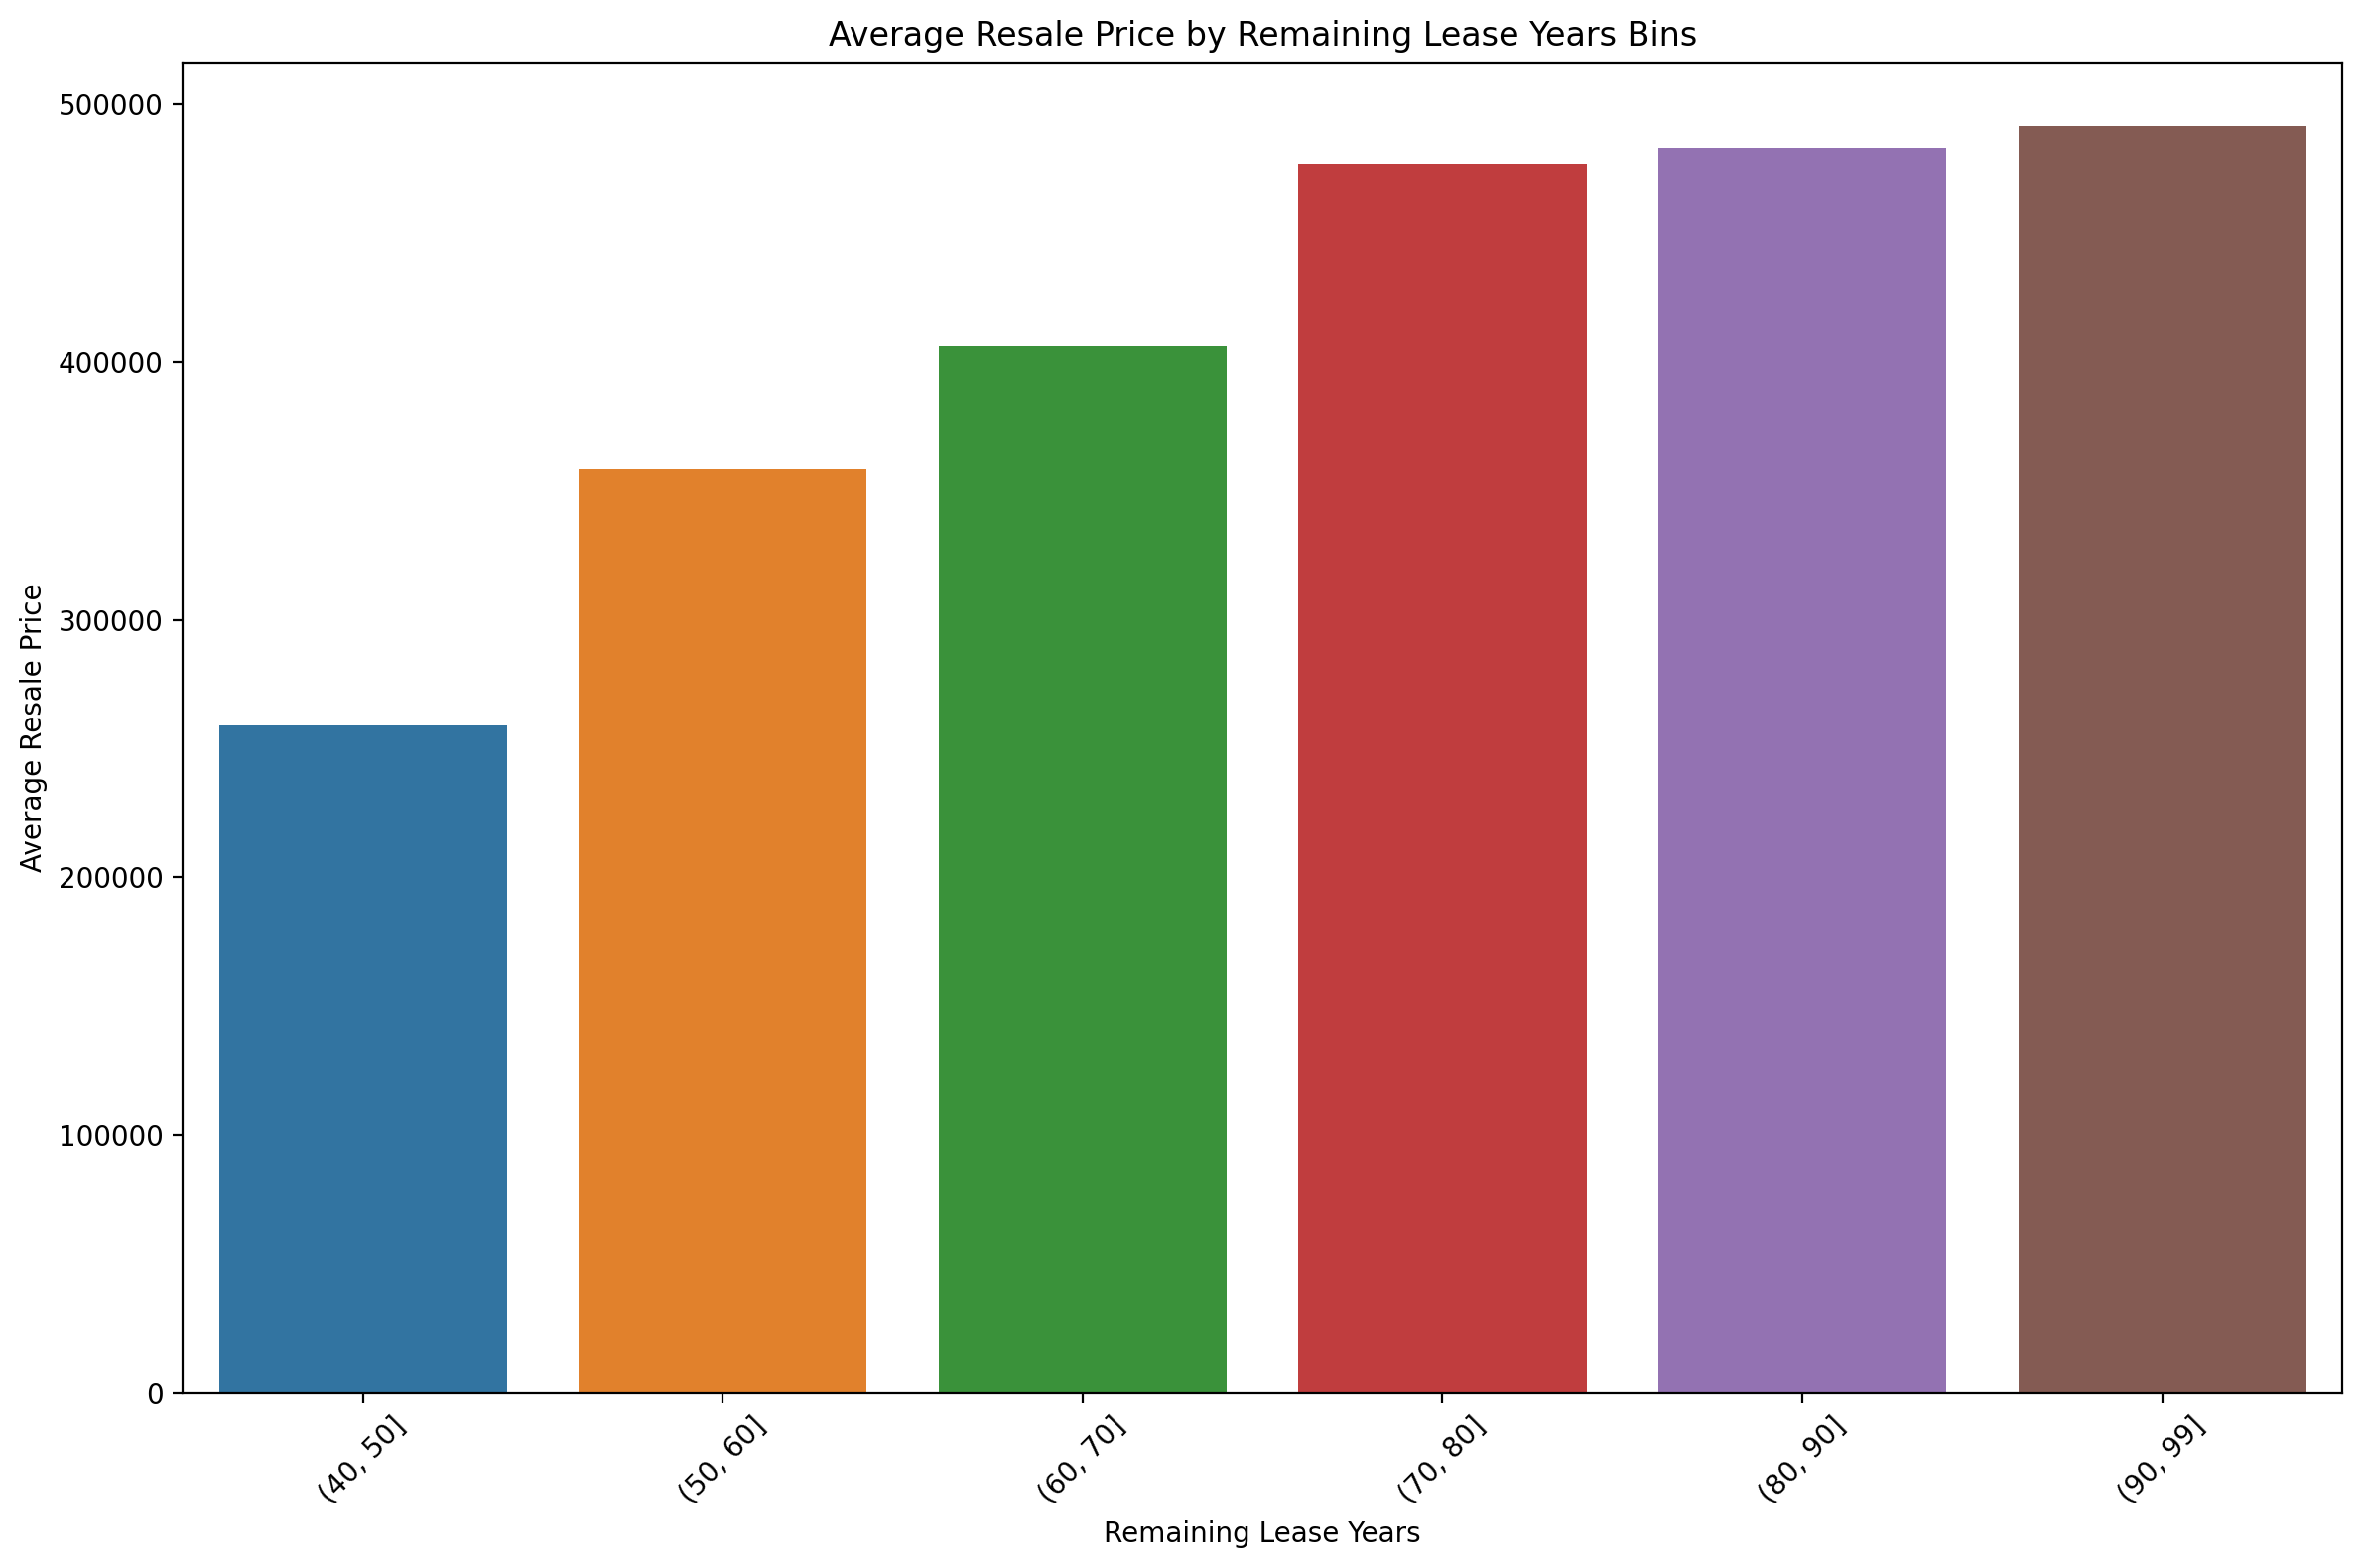

In [28]:
# Define the bin edges
bins = [40, 50, 60, 70, 80, 90, 99]
df['lease_years_bin'] = pd.cut(df['remaining_lease_years'], bins=bins)
mean_prices_by_bin = df.groupby('lease_years_bin')['resale_price'].mean().reset_index()

# Plotting the average resale price by the binned lease years
plt.figure(figsize=(12, 8), dpi = 200)  
sns.barplot(x='lease_years_bin', y='resale_price', data=mean_prices_by_bin)
plt.xticks(rotation=45)
plt.title('Average Resale Price by Remaining Lease Years Bins')
plt.xlabel('Remaining Lease Years')
plt.ylabel('Average Resale Price')
plt.tight_layout()  
plt.show()

df.drop('lease_years_bin', axis=1, inplace=True)

Another factor which affects the house price is the remaining lease years. As observed in the chart, there is a general trend that flats with more years left on their lease tend to have higher average resale prices. This trend aligns with the nature of property ownership in Singapore, where HDB flats are typically leased for 99 years; as the lease diminishes, so typically does the value of the flat. This is because purchasers are acquiring fewer years of residence before the property must be returned to the government. Furthermore, flats with a shorter remaining lease are often priced lower, reflecting the decreased time that buyers will possess the property.

### Finding relation between the features via correlation heatmap
Finding the correlation helps in identifying how each feature is correlated and also how it is correlated to the target variable.
Correlation ranges from -1 to 1.

* -1 =< Corr < 0 --> Negatively correlated <br>
* Corr = 0 --> No correlation <br>
* 0 < Corr =< 1 --> Positively correlated <br>

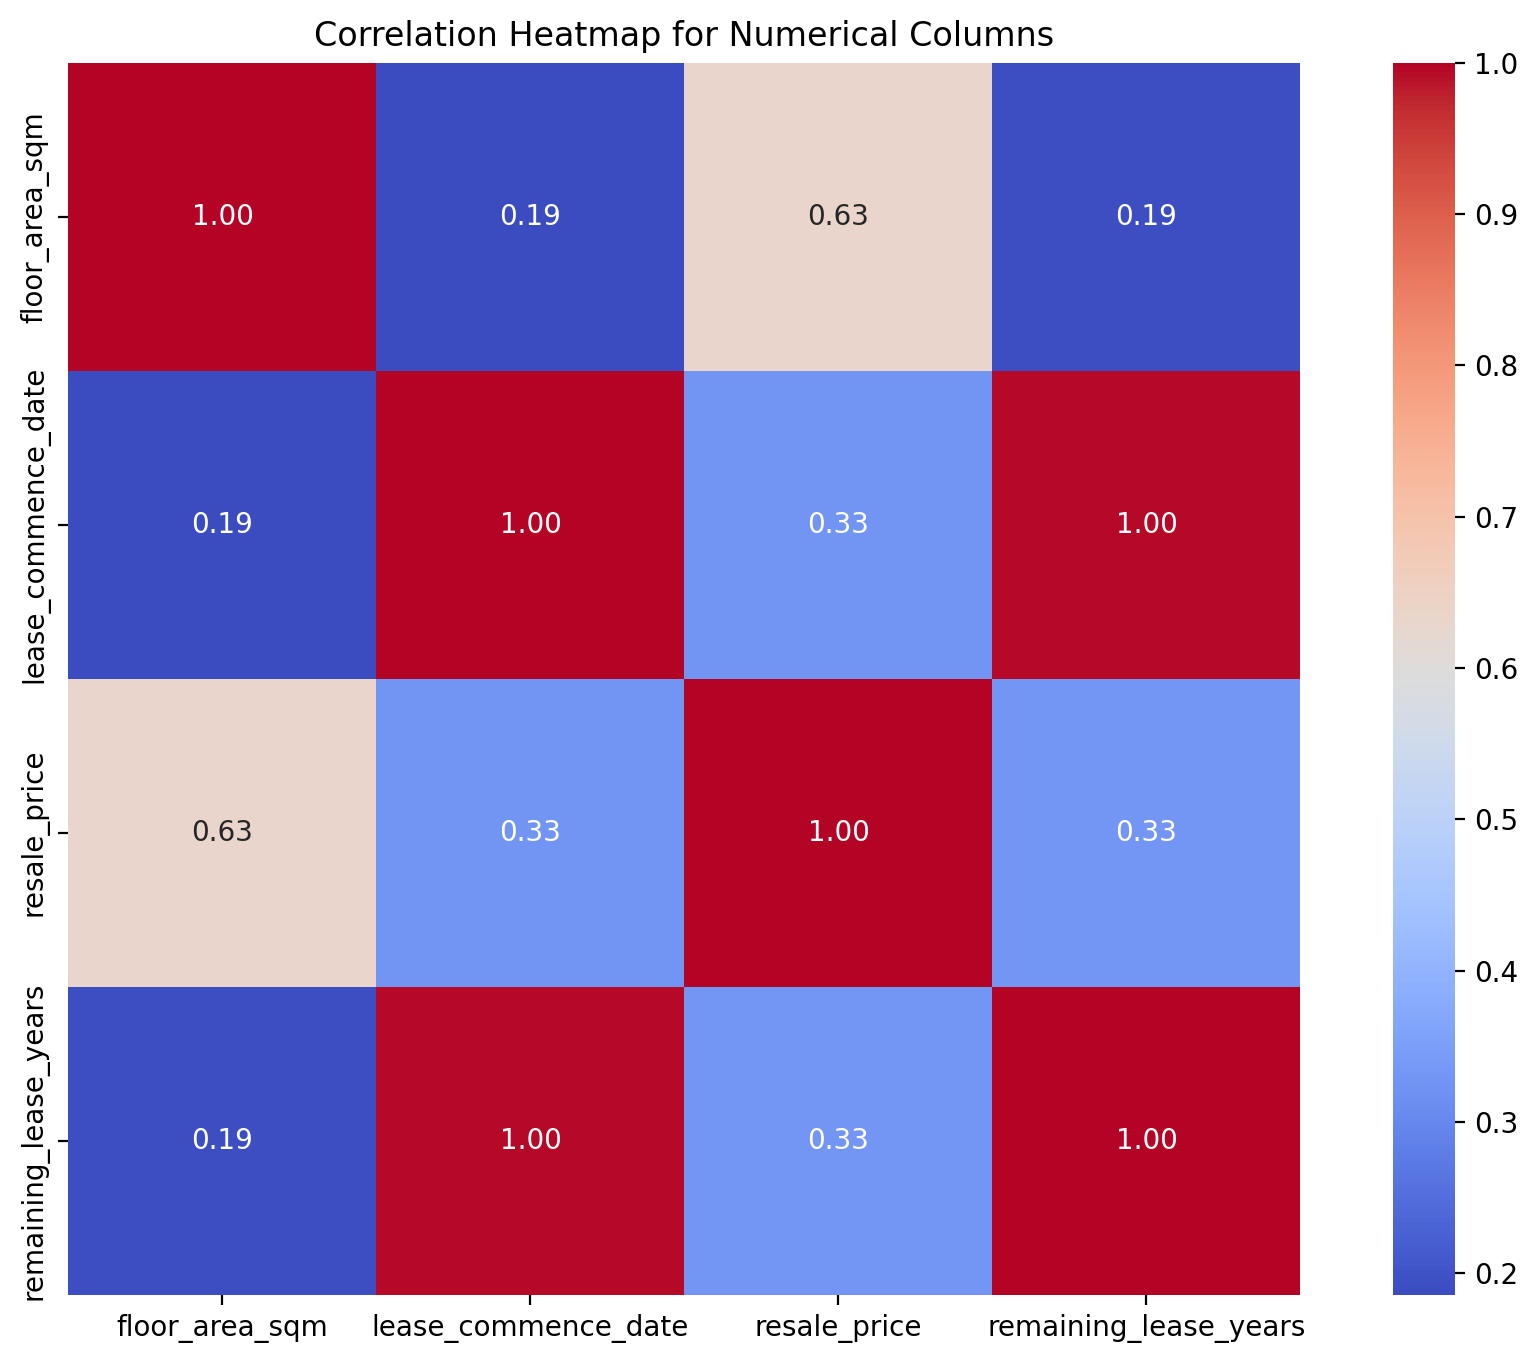

In [29]:
# Selecting only the numerical columns for the correlation heatmap
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
corr = numerical_df.corr()

plt.figure(figsize=(12, 8), dpi = 200)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

### Train the model using fastai and PyTorch

The first thing I will do is sort the data by month and ensure that it is in chronological order. <br>
Next, I will use the last 20% of the data for my validation set as I am dealing with time-series data, I want to know how accurate my model works on future data.

In [30]:
df['month'] = pd.to_datetime(df['month'])

# Sort your dataframe by 'month' to ensure it's in chronological order
df = df.sort_values('month')

In [31]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,61
793,2017-01-01,SEMBAWANG,4 ROOM,477,SEMBAWANG DR,01 TO 03,86.0,Model A2,2000,305000.0,82
792,2017-01-01,QUEENSTOWN,5 ROOM,52,STRATHMORE AVE,19 TO 21,110.0,Improved,2006,860000.0,88
791,2017-01-01,QUEENSTOWN,5 ROOM,18,DOVER CRES,19 TO 21,111.0,Improved,2003,800000.0,85
790,2017-01-01,QUEENSTOWN,5 ROOM,21,HOLLAND DR,04 TO 06,119.0,Standard,1975,790000.0,57
...,...,...,...,...,...,...,...,...,...,...,...
78716,2020-09-01,HOUGANG,4 ROOM,602,HOUGANG AVE 4,07 TO 09,84.0,Simplified,1985,345000.0,64
78717,2020-09-01,HOUGANG,4 ROOM,603,HOUGANG AVE 4,04 TO 06,104.0,Model A,1985,375000.0,64
78718,2020-09-01,HOUGANG,4 ROOM,334,HOUGANG AVE 5,04 TO 06,104.0,Model A,1983,368000.0,61
78711,2020-09-01,HOUGANG,4 ROOM,516,HOUGANG AVE 10,04 TO 06,104.0,Model A,1986,490000.0,64


In [32]:
# Find the cutoff for the last 20% of the months
cut = int(0.8 * len(df))  
train_idx = range(0, cut)
valid_idx = range(cut, len(df))

In [33]:
len(train_idx)

64299

In [34]:
len(valid_idx)

16075

In [35]:
# Now create the DataLoaders
splits = (list(train_idx), list(valid_idx))

# Define categorical and continuous columns, and the target
cat_names = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
cont_names = ['floor_area_sqm', 'remaining_lease_years']
y_names = 'resale_price'

In [36]:
dls = TabularPandas(
    df, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=cat_names,
    cont_names=cont_names,
    y_names=y_names, y_block = RegressionBlock(),
).dataloaders(path=".")

In [37]:
learn = tabular_learner(dls, y_range=(0, df[y_names].max()*1.1), layers=[50,50], n_out=1, loss_func=F.mse_loss, metrics=rmse)

SuggestedLRs(slide=6.309573450380412e-07, valley=0.001737800776027143)

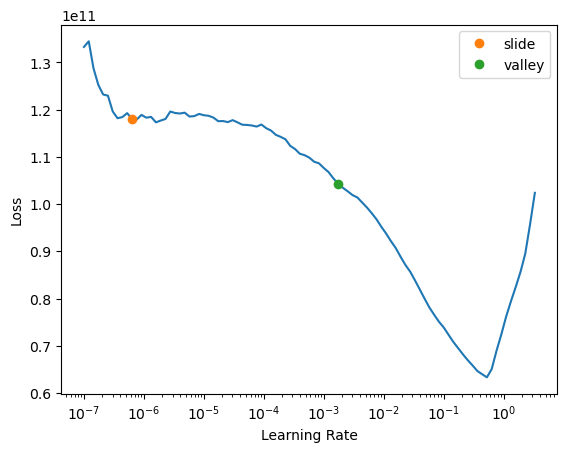

In [38]:
learn.lr_find(suggest_funcs=(slide, valley))

In [39]:
learn.fit(20, lr=0.0001)

epoch,train_loss,valid_loss,_rmse,time
0,11491930112.000000,6648069120.000000,81535.695312,00:52
1,1738237568.000000,1541827200.000000,39266.109375,00:47
2,1422672000.000000,1559995648.000000,39496.777344,00:47
3,1272906752.000000,1396759424.000000,37373.242188,00:47
4,1194705536.000000,1182843904.000000,34392.492188,00:46
5,1247532416.000000,1219297920.000000,34918.441406,00:46
6,1200720256.000000,1141607040.000000,33787.675781,00:47
7,1075186816.000000,1229469056.000000,35063.781250,00:55
8,1151442432.000000,1103164416.000000,33213.917969,00:54
9,1072138688.000000,1137739776.000000,33730.398438,00:51


### Evaluate the model's performance

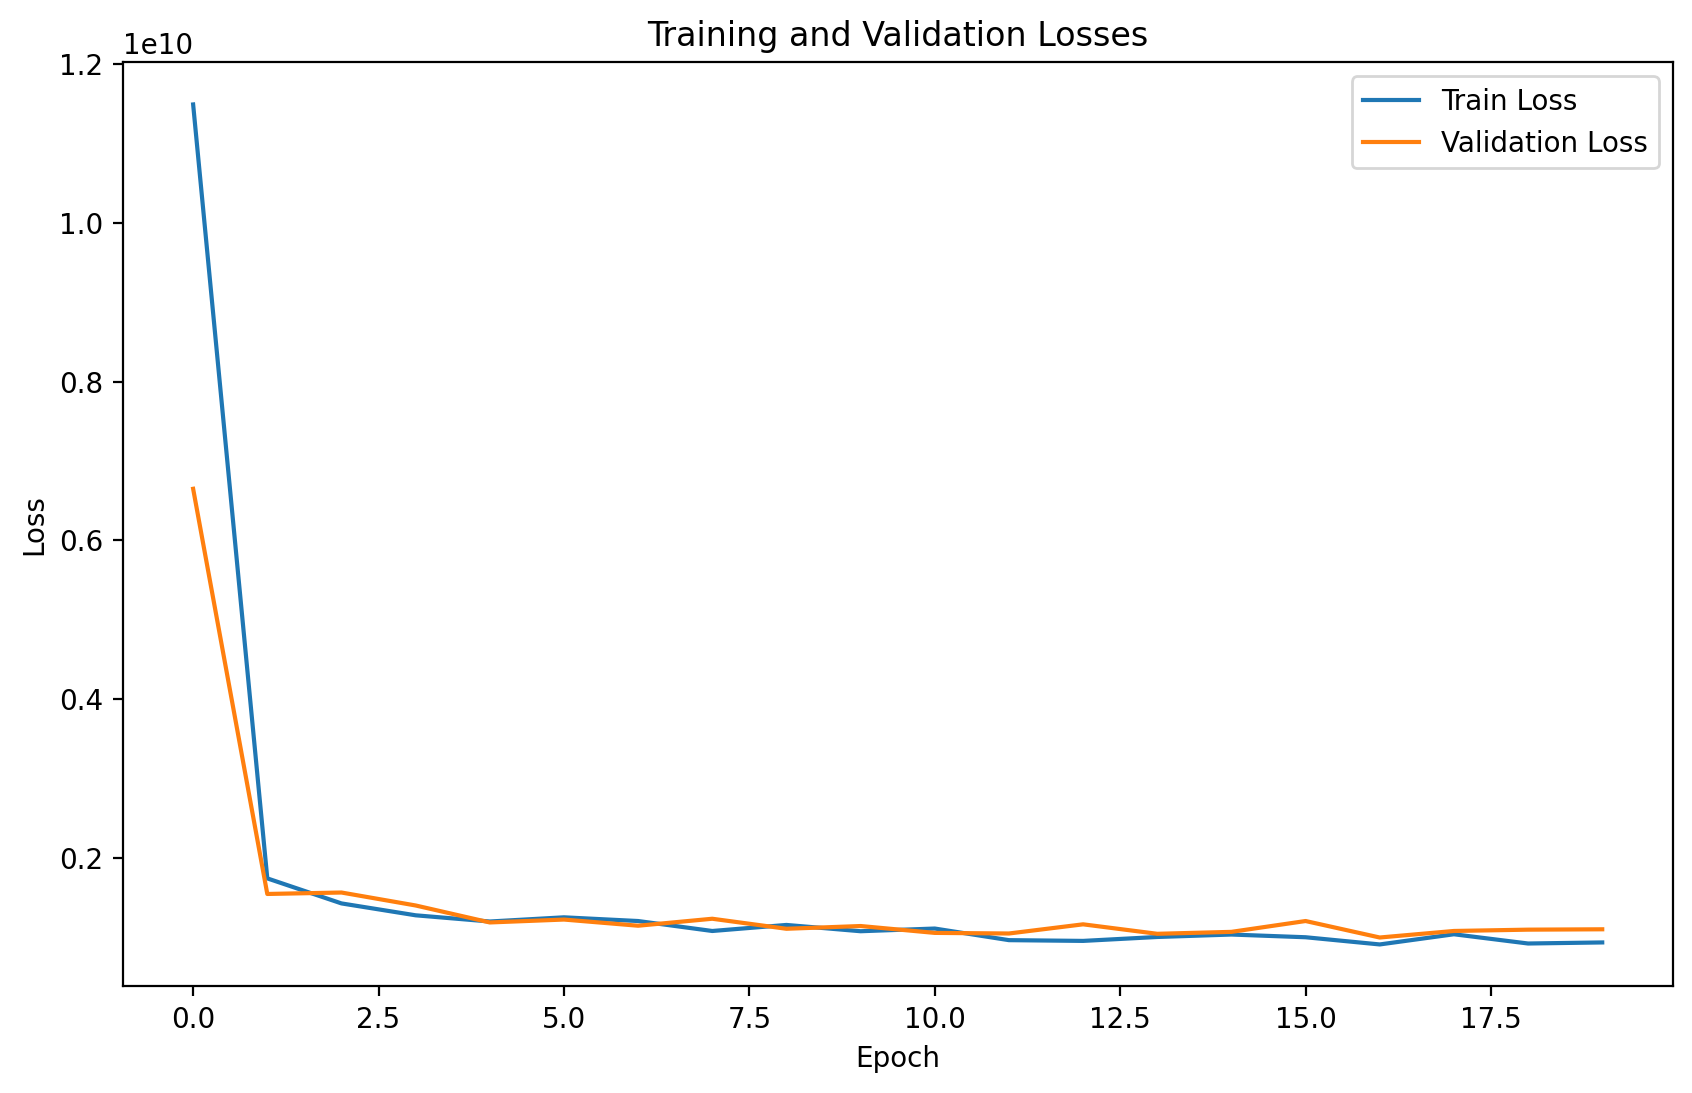

In [40]:
# Extract training and validation losses
train_losses = [x[0] for x in learn.recorder.values]
valid_losses = [x[1] for x in learn.recorder.values]

# Get the number of epochs
epochs = range(len(train_losses))

# Plot the losses
plt.figure(figsize=(10, 6), dpi = 200)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

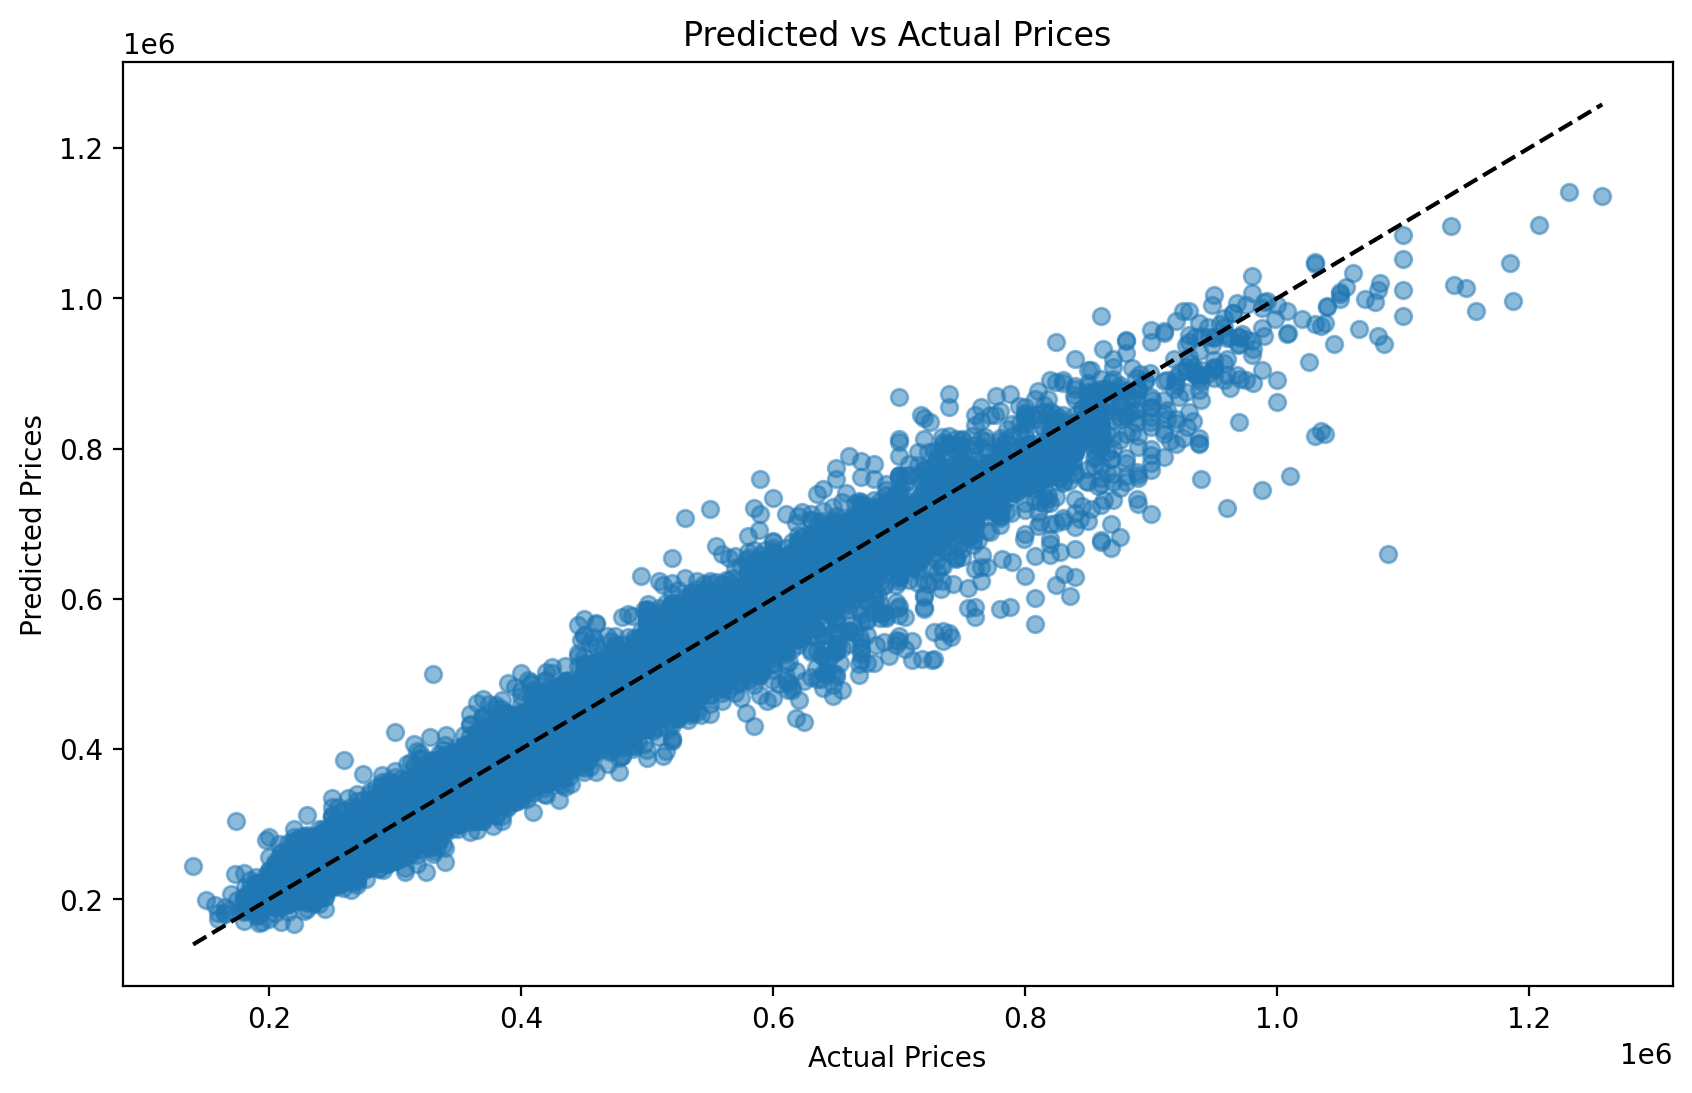

In [41]:
# Getting predictions and true values
preds, targets = learn.get_preds(dl=learn.dls.valid)
preds = preds.numpy()
targets = targets.numpy()

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6), dpi = 200)
plt.scatter(targets, preds, alpha=0.5)
plt.plot([targets.min(), targets.max()], [targets.min(), targets.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show();

In [42]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Calculate additional metrics
mae = mean_absolute_error(targets, preds)
r2 = r2_score(targets, preds)
rmse_value = mean_squared_error(targets, preds, squared=False)

# Print out the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')
print(f'RMSE: {rmse_value}')

Mean Absolute Error (MAE): 23371.01171875
R-squared (R²): 0.9525800544282299
RMSE: 33114.6796875


### Export the model

In [43]:
learn.export('model.pkl')